# Data Preprocessing and Cleaning

This document outlines the steps and techniques used to preprocess and clean the dataset. Data preprocessing is a crucial step to ensure the quality and usability of the data before performing any analysis or building machine learning models.

## Objective

- Handle missing values
- Remove duplicates
- Normalize and scale numerical data
- Encode categorical variables
- Handle outliers
- Remove constant features
- Save processed datasets

## Requirements

- Python 3.x
- Required Libraries: `pandas`, `numpy`, `scikit-learn`, `matplotlib`, `seaborn`

## Steps

1. **Loading the Dataset**: 
   - Imported and loaded the dataset for preprocessing.
   - Displayed features and previewed the data.

2. **Removing Duplicates**: 
   - Identified and removed duplicate rows to ensure data integrity.

3. **Handling Missing Values**: 
   - Managed missing values based on their percentage:
     - < 5%: Imputed with mean (for numerical) or mode (for categorical).
     - 5–30%: Imputed with median (for numerical) or mode (for categorical).
     - 30–60%: Imputed cautiously, defaulting to mode for this dataset.
     - > 60%: Dropped features with excessive missing values.

4. **Encoding Categorical Variables**: 
   - Used one-hot encoding to transform categorical features into numerical form.

5. **Outlier Detection and Removal**: 
   - Detected outliers in numeric features using the Interquartile Range (IQR) method.
   - Removed outliers for cleaner data in one dataset.

6. **Normalization and Scaling**:
   - Applied Min-Max Scaling to normalize numeric features to a range of [0, 1] for both datasets (with and without outliers).

7. **Removing Constant Features**:
   - Identified and removed features with no variability.

8. **Saving Processed Datasets**:
   - Saved two versions of the processed dataset:
     - `data_final_no_outlier.csv`: Dataset with outliers removed.
     - `data_final_with_outlier.csv`: Dataset with outliers retained.

9. **Visualizing the Data** (Optional):
   - Visualized the distributions of features in both datasets to compare the effects of outlier removal and normalization.

This document provides a comprehensive overview of the preprocessing steps applied to prepare the dataset for further analysis or modeling.

# Introduction to Libraries

We are importing essential libraries for data manipulation (`pandas`, `numpy`), visualization (`matplotlib`, `seaborn`), and preprocessing (`MinMaxScaler`, `StandardScaler`) to prepare and analyze the data effectively.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Loading the Dataset

We are loading the dataset from the file `train.csv` and performing the following actions:

1. **Loading the Data**: 
   - The dataset is loaded into a `pandas` DataFrame for easy manipulation and analysis.

2. **Displaying Features**:
   - A list of all column names (features) in the dataset is displayed to understand the structure of the data.

3. **Previewing the Data**:
   - The first few rows of the dataset are printed to inspect the data and check its format, completeness, and overall structure.

In [2]:
import pandas as pd

# File paths
data_file = "../original data/communities+and+crime/communities.data"
names_file = "../original data/communities+and+crime/communities.names"

# Step 1: Parse the .names file to extract attribute names
attribute_names = []
with open(names_file, "r") as f:
    for line in f:
        line = line.strip()
        if line.startswith("--"):  # Skip comment lines
            continue
        if line.startswith("@attribute"):  # Attribute definitions
            parts = line.split()
            attribute_name = parts[1]  # The second item is the attribute name
            attribute_names.append(attribute_name)

# Step 2: Load the .data file with extracted attribute names
data = pd.read_csv(data_file, header=None, names=attribute_names, na_values=["?", "NA"])

# to drop: 
# -- state: US state (by number) - not counted as predictive above, but if considered, should be consided nominal (nominal)
# -- county: numeric code for county - not predictive, and many missing values (numeric)
# -- community: numeric code for community - not predictive and many missing values (numeric)
# -- communityname: community name - not predictive - for information only (string)
# -- fold: fold number for non-random 10 fold cross validation, potentially useful for debugging, paired tests - not predictive (numeric)

data = data.drop(columns=["state", "county", "community", "communityname", "fold"])

# Display the first few rows to inspect the dataset
print("\nPreview of the dataset:")
print(data.head())

# Step 3: Display basic info about the dataset
print("\nBasic Information about the Dataset:")
print(data.info())

# Step 4: Check for missing values
print("\nMissing Values Summary:")
print(data.isnull().sum())


Preview of the dataset:
   population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0        0.19           0.33          0.02          0.90          0.12   
1        0.00           0.16          0.12          0.74          0.45   
2        0.00           0.42          0.49          0.56          0.17   
3        0.04           0.77          1.00          0.08          0.12   
4        0.01           0.55          0.02          0.95          0.09   

   racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0         0.17         0.34         0.47         0.29        0.32  ...   
1         0.07         0.26         0.59         0.35        0.27  ...   
2         0.04         0.39         0.47         0.28        0.32  ...   
3         0.10         0.51         0.50         0.34        0.21  ...   
4         0.05         0.38         0.38         0.23        0.36  ...   

   LandArea  PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
0      0.12     0.2

# Handling Duplicates and Missing Values

1. **Removing Duplicate Rows**:
   - We identify and remove duplicate rows from the dataset to ensure data integrity and avoid redundancy.

2. **Handling Missing Values**:
   - We calculate the percentage of missing data for each feature and handle them based on predefined thresholds:
     - **< 5% Missing**: Impute missing values using the mean (for numerical data) or mode (for categorical data).
     - **5–30% Missing**: Use median imputation for numerical data or mode for categorical data for more robustness.
     - **30–60% Missing**: Warn about features with significant missing data and handle cautiously (default to mode imputation in this case, but user discretion is advised).
     - **> 60% Missing**: Drop features with excessive missing data unless they are deemed critical.

- **Removing Duplicates**: Prevents bias and inflated significance of repeated data points during analysis.
- **Handling Missing Values**: Ensures data completeness while minimizing the risk of introducing bias, maintaining the dataset's usability for further analysis or modeling.

In [3]:
# Remove duplicate rows
print(f"Number of duplicate rows before removal: {data.duplicated().sum()}")
data = data.drop_duplicates()
print(f"Number of duplicate rows after removal: {data.duplicated().sum()}")

# Handling null values based on percentage of missing data
print("\nNull values per feature before handling:")
missing_percentages = data.isnull().mean() * 100
print(missing_percentages)

# Define actions for different ranges of missing data percentages
for col in data.columns:
    missing_percentage = missing_percentages[col]
    if missing_percentage < 5:
        # Less than 5% missing: Fill or drop individual rows
        if data[col].dtype in ['int64', 'float64']:
            data[col].fillna(data[col].mean(), inplace=True)
        else:
            data[col].fillna(data[col].mode()[0], inplace=True)
    elif 5 <= missing_percentage <= 30:
        # 5-30% missing: Impute using mean, median, or mode
        if data[col].dtype in ['int64', 'float64']:
            data[col].fillna(data[col].median(), inplace=True)  # Using median instead of mean for more robustness
        else:
            data[col].fillna(data[col].mode()[0], inplace=True)
    elif 30 < missing_percentage <= 60:
        # 30-60% missing: Be cautious; decide based on feature importance
        print(f"Feature '{col}' has {missing_percentage:.2f}% missing values; consider its importance before further action.")
        # Default action here is to drop the column, but you can modify based on domain knowledge
        data[col].fillna(data[col].mode()[0], inplace=True)  # Example: Impute with mode
    elif missing_percentage > 60:
        # More than 60% missing: Often best to drop the feature
        print(f"Feature '{col}' has {missing_percentage:.2f}% missing values; dropping the column.")
        data.drop(columns=[col], inplace=True)

print("\nNull values per feature after handling:")
print(data.isnull().sum())

Number of duplicate rows before removal: 0
Number of duplicate rows after removal: 0

Null values per feature before handling:
population              0.000000
householdsize           0.000000
racepctblack            0.000000
racePctWhite            0.000000
racePctAsian            0.000000
                         ...    
LemasPctPolicOnPatr    84.002006
LemasGangUnitDeploy    84.002006
LemasPctOfficDrugUn     0.000000
PolicBudgPerPop        84.002006
ViolentCrimesPerPop     0.000000
Length: 123, dtype: float64
Feature 'LemasSwornFT' has 84.00% missing values; dropping the column.
Feature 'LemasSwFTPerPop' has 84.00% missing values; dropping the column.
Feature 'LemasSwFTFieldOps' has 84.00% missing values; dropping the column.
Feature 'LemasSwFTFieldPerPop' has 84.00% missing values; dropping the column.
Feature 'LemasTotalReq' has 84.00% missing values; dropping the column.
Feature 'LemasTotReqPerPop' has 84.00% missing values; dropping the column.
Feature 'PolicReqPerOffic' has 84.

C:\Users\mustapha\AppData\Local\Temp\ipykernel_36100\2759134192.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
C:\Users\mustapha\AppData\Local\Temp\ipykernel_36100\2759134192.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


# Analyzing Correlation

We are transforming categorical features into numerical representations and analyzing the relationships between features. Here's what we are doing:

1. **Encoding Categorical Features**:
   - Using one-hot encoding (`pd.get_dummies`) to convert categorical features into binary columns, enabling them to be used in numerical computations.

2. **Computing the Correlation Matrix**:
   - Calculating the correlation coefficients between all features to identify relationships and dependencies.

3. **Visualizing the Correlation Matrix**:
   - Creating a heatmap to visually inspect the strength and direction of relationships between features.

4. **Identifying Highly Correlated Pairs**:
   - Highlighting pairs of features with an absolute correlation greater than `0.8`, which could indicate redundancy or multicollinearity.

This process helps in feature selection and identifying which features might need to be removed or transformed to improve model performance.


Correlation Matrix:
                     population  householdsize  racepctblack  racePctWhite  \
population             1.000000      -0.046148      0.231178     -0.300845   
householdsize         -0.046148       1.000000     -0.067109     -0.235907   
racepctblack           0.231178      -0.067109      1.000000     -0.794389   
racePctWhite          -0.300845      -0.235907     -0.794389      1.000000   
racePctAsian           0.181603       0.201996     -0.106738     -0.270266   
...                         ...            ...           ...           ...   
LandArea               0.713652      -0.015078      0.149758     -0.131389   
PopDens                0.231897      -0.004072      0.095053     -0.337458   
PctUsePubTrans         0.270356      -0.051506      0.147023     -0.215636   
LemasPctOfficDrugUn    0.466352      -0.094368      0.260793     -0.276234   
ViolentCrimesPerPop    0.367157      -0.034923      0.631264     -0.684770   

                     racePctAsian  racePct

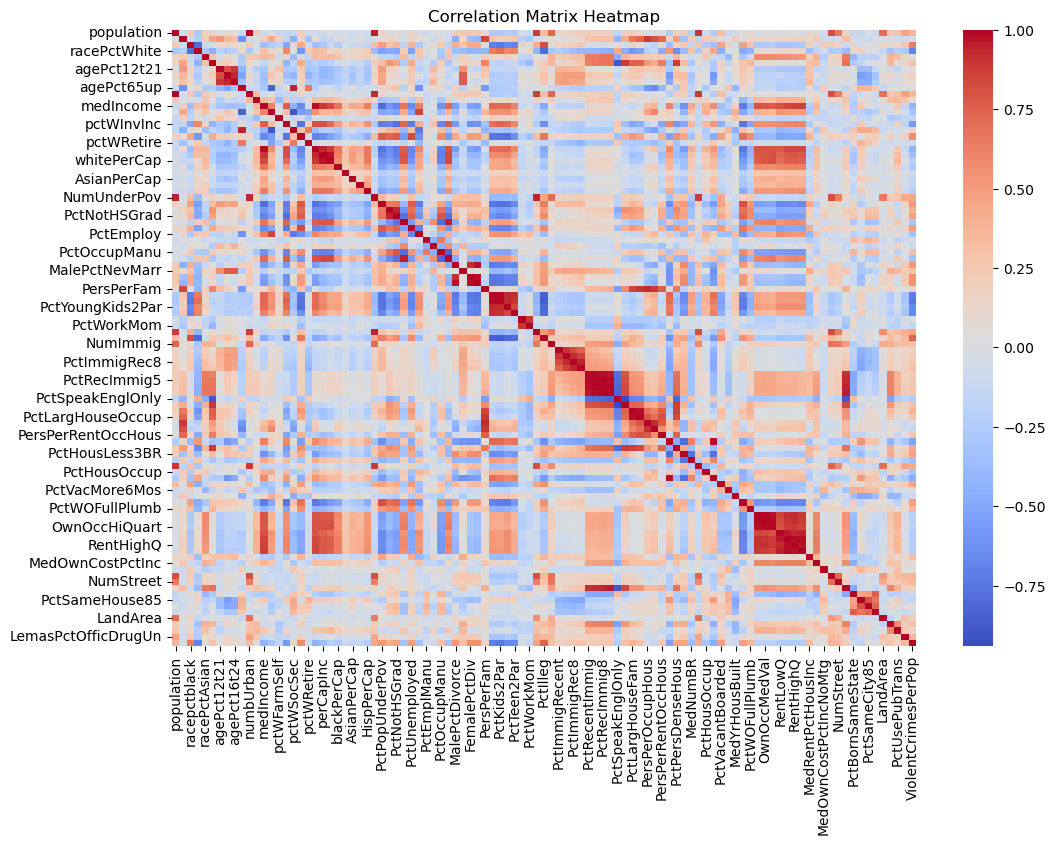


Highly Correlated Feature Pairs (|correlation| > 0.85):
numbUrban and population: 0.99
NumUnderPov and population: 0.95
NumIlleg and population: 0.89
HousVacant and population: 0.90
PersPerOccupHous and householdsize: 0.89
PctSpeakEnglOnly and racePctHisp: -0.89
PctNotSpeakEnglWell and racePctHisp: 0.89
PctPersDenseHous and racePctHisp: 0.88
agePct16t24 and agePct12t21: 0.89
agePct16t24 and agePct12t29: 0.93
agePct12t21 and agePct16t24: 0.89
agePct12t29 and agePct16t24: 0.93
pctWSocSec and agePct65up: 0.94
population and numbUrban: 0.99
NumUnderPov and numbUrban: 0.94
NumIlleg and numbUrban: 0.88
HousVacant and numbUrban: 0.89
medFamInc and medIncome: 0.98
perCapInc and medIncome: 0.89
RentMedian and medIncome: 0.85
RentHighQ and medIncome: 0.86
MedRent and medIncome: 0.86
pctWSocSec and pctWWage: -0.90
PctEmploy and pctWWage: 0.86
agePct65up and pctWSocSec: 0.94
pctWWage and pctWSocSec: -0.90
medIncome and medFamInc: 0.98
perCapInc and medFamInc: 0.94
whitePerCap and medFamInc: 0.88


In [4]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Identify highly correlated pairs (absolute correlation > 0.8)
threshold = 0.85
high_correlation_pairs = []
for col in correlation_matrix.columns:
    for row in correlation_matrix.index:
        if abs(correlation_matrix.loc[row, col]) > threshold and row != col:
            high_correlation_pairs.append((row, col, correlation_matrix.loc[row, col]))

# Display highly correlated pairs
if high_correlation_pairs:
    print("\nHighly Correlated Feature Pairs (|correlation| > 0.85):")
    for pair in high_correlation_pairs:
        print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")
else:
    print("\nNo highly correlated feature pairs found.")


# remove them and analyze the shapes:
print("\nShape of the dataset before removing highly correlated features:")
print(data.shape)
# Drop one feature from each highly correlated pair
data = data.drop(columns=[pair[1] for pair in high_correlation_pairs])
print("\nShape of the dataset after removing highly correlated features:")
print(data.shape)

# Feature Distributions

We are analyzing the distributions of each feature in the dataset to better understand their characteristics and patterns. This includes:

1. **Summary Statistics**:
   - Displaying descriptive statistics for each feature (e.g., mean, min, max, std, etc.) to understand the data's range, central tendency, and variability.

2. **Visualization**:
   - **Numerical Features**:
     - Using histograms with KDE (Kernel Density Estimation) to visualize the distribution and density of numerical features.
   - **Categorical Features**:
     - Using count plots to display the frequency of each category.

This helps identify potential issues like skewness, outliers, or imbalanced categories, guiding further preprocessing steps.

Distributions for each feature:

Feature: racepctblack
count    1994.000000
mean        0.179629
std         0.253442
min         0.000000
25%         0.020000
50%         0.060000
75%         0.230000
max         1.000000
Name: racepctblack, dtype: float64

Feature: racePctWhite
count    1994.000000
mean        0.753716
std         0.244039
min         0.000000
25%         0.630000
50%         0.850000
75%         0.940000
max         1.000000
Name: racePctWhite, dtype: float64

Feature: racePctAsian
count    1994.000000
mean        0.153681
std         0.208877
min         0.000000
25%         0.040000
50%         0.070000
75%         0.170000
max         1.000000
Name: racePctAsian, dtype: float64

Feature: pctUrban
count    1994.000000
mean        0.696269
std         0.444811
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: pctUrban, dtype: float64

Feature: pctWFarmSelf
count    1994.000000
mean        0.291570
std    

C:\Users\mustapha\AppData\Local\Temp\ipykernel_36100\3522839821.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 4))



Feature: PctHousLess3BR
count    1994.000000
mean        0.495186
std         0.172508
min         0.000000
25%         0.400000
50%         0.510000
75%         0.600000
max         1.000000
Name: PctHousLess3BR, dtype: float64

Feature: MedNumBR
count    1994.000000
mean        0.314694
std         0.255182
min         0.000000
25%         0.000000
50%         0.500000
75%         0.500000
max         1.000000
Name: MedNumBR, dtype: float64

Feature: PctHousOccup
count    1994.000000
mean        0.719549
std         0.194024
min         0.000000
25%         0.630000
50%         0.770000
75%         0.860000
max         1.000000
Name: PctHousOccup, dtype: float64

Feature: PctVacantBoarded
count    1994.000000
mean        0.204529
std         0.217770
min         0.000000
25%         0.060000
50%         0.130000
75%         0.270000
max         1.000000
Name: PctVacantBoarded, dtype: float64

Feature: PctVacMore6Mos
count    1994.000000
mean        0.433335
std         0.188986
min 

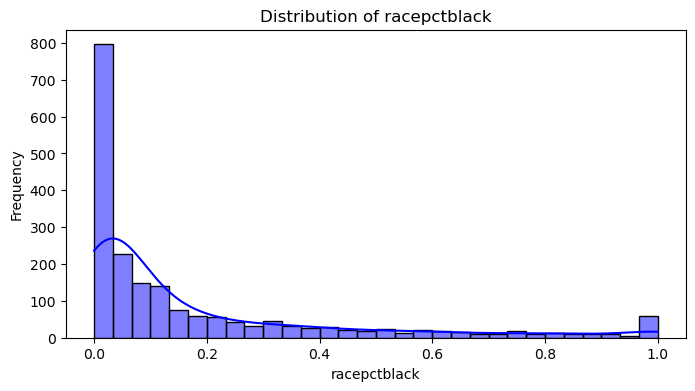

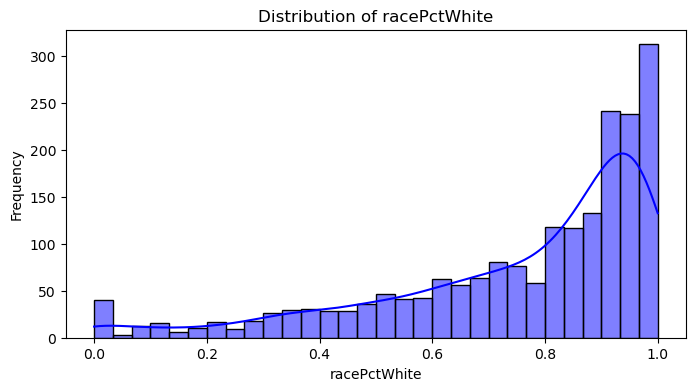

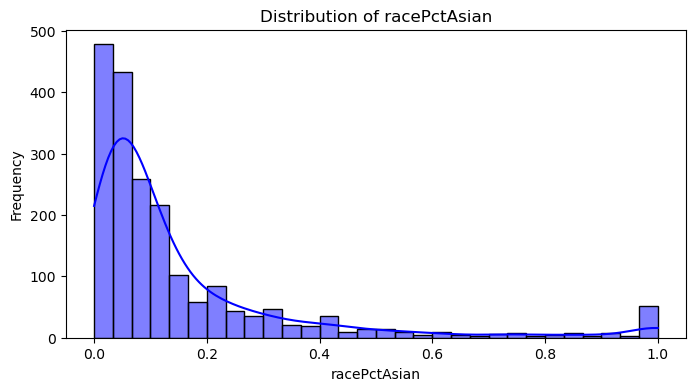

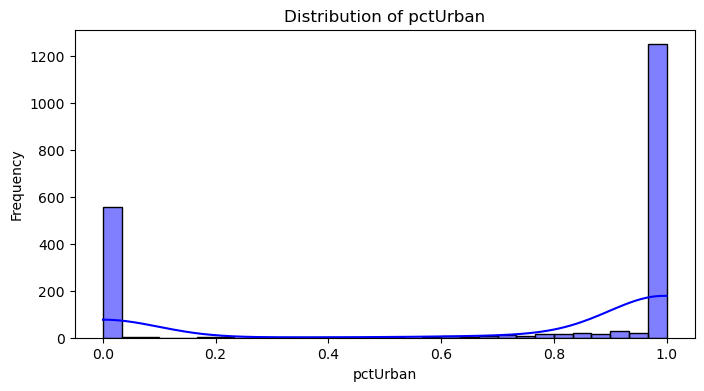

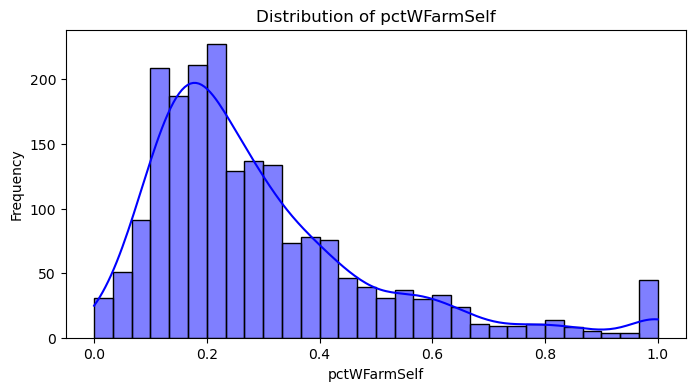

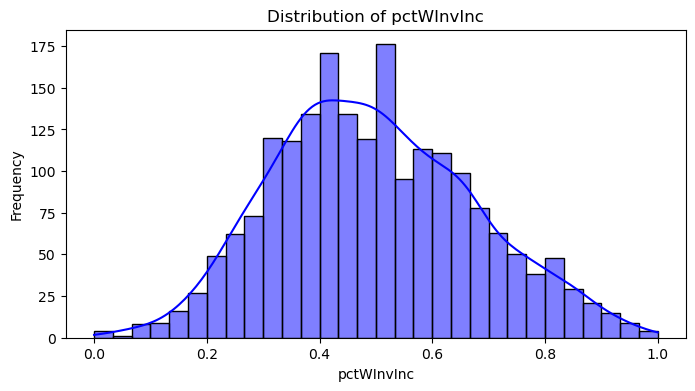

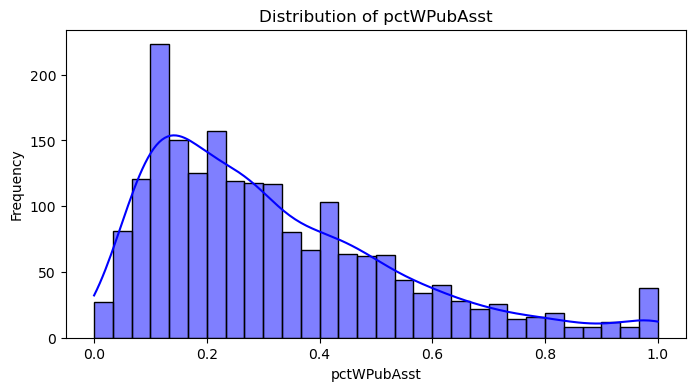

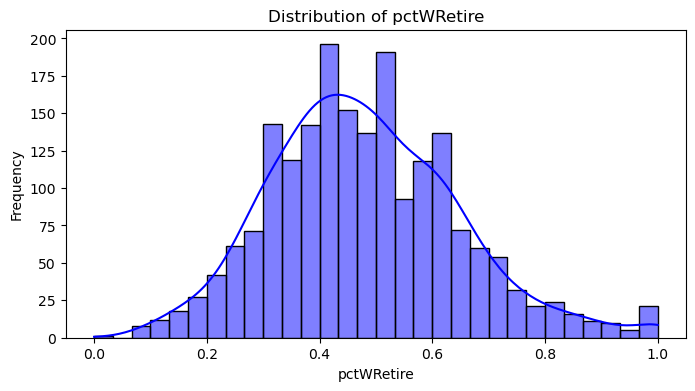

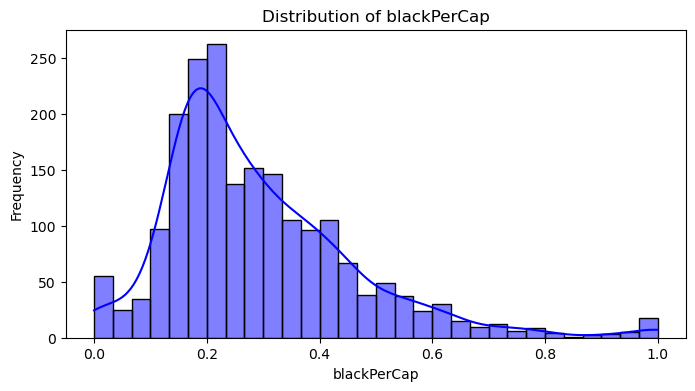

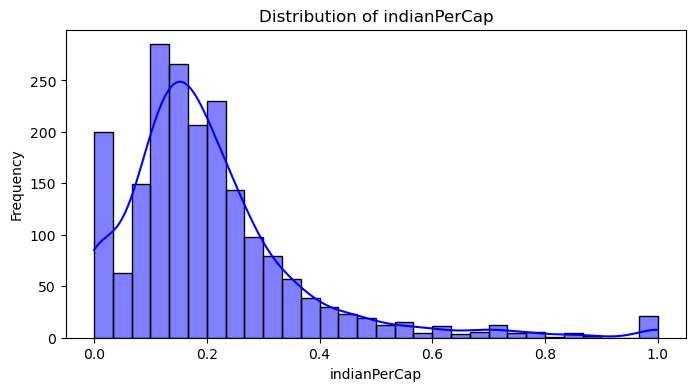

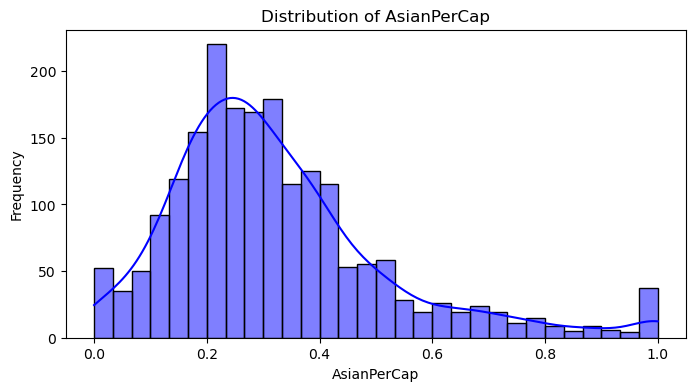

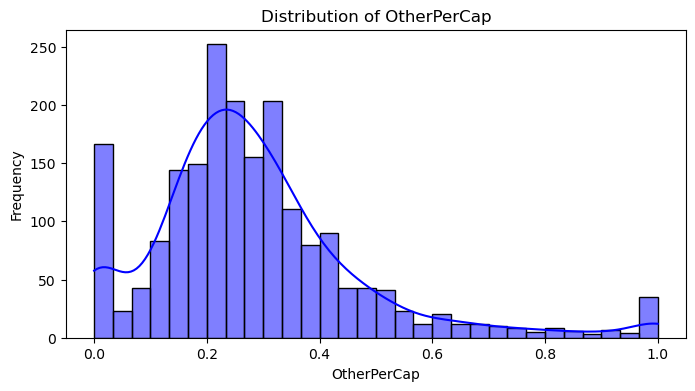

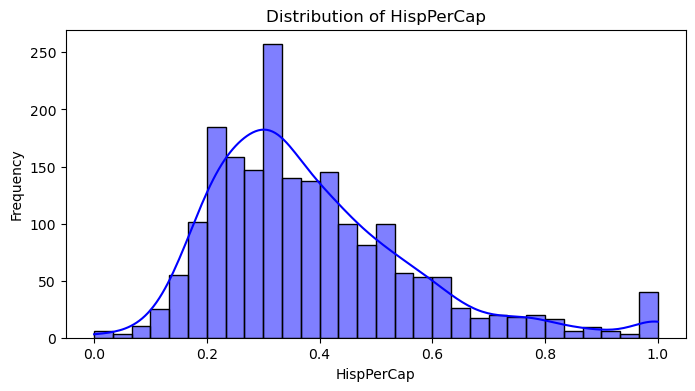

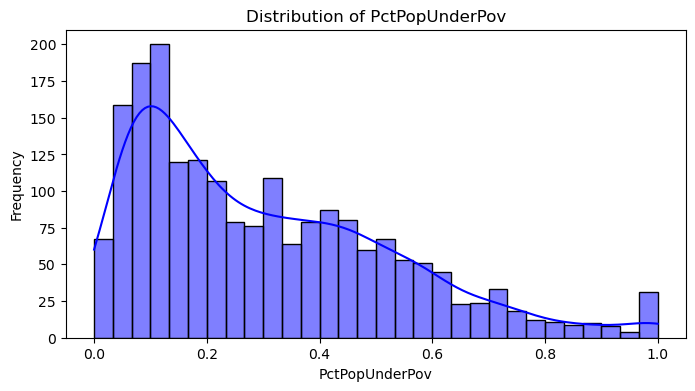

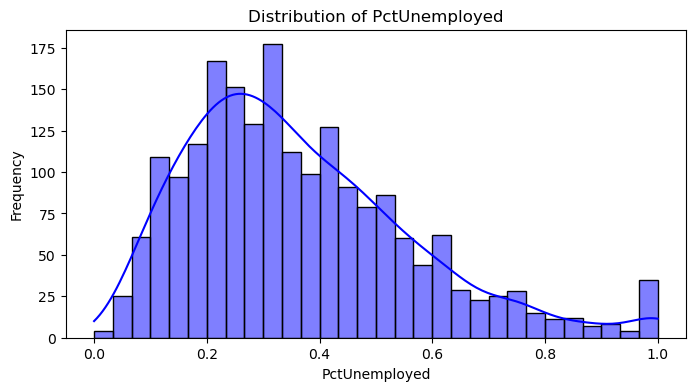

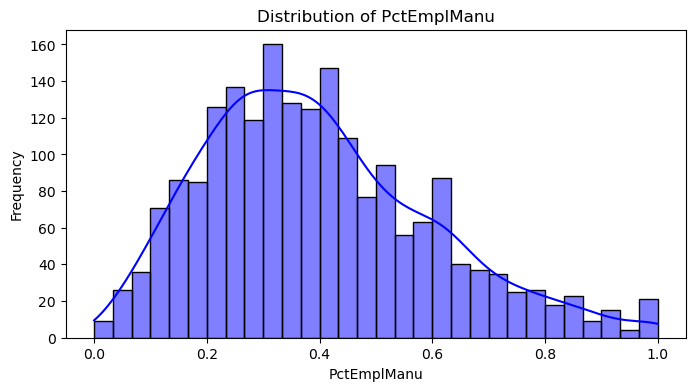

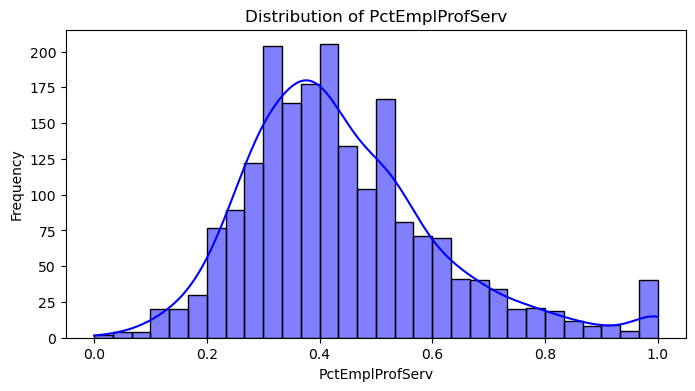

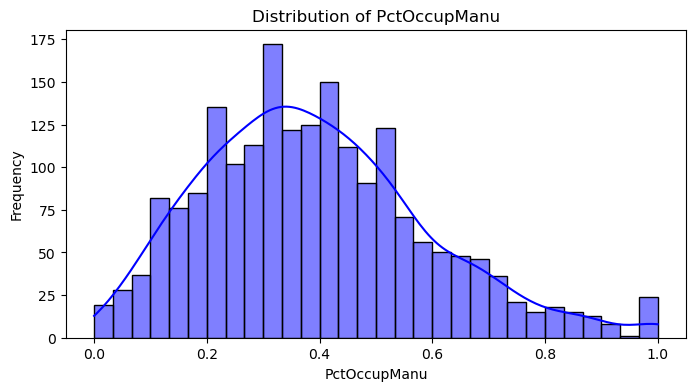

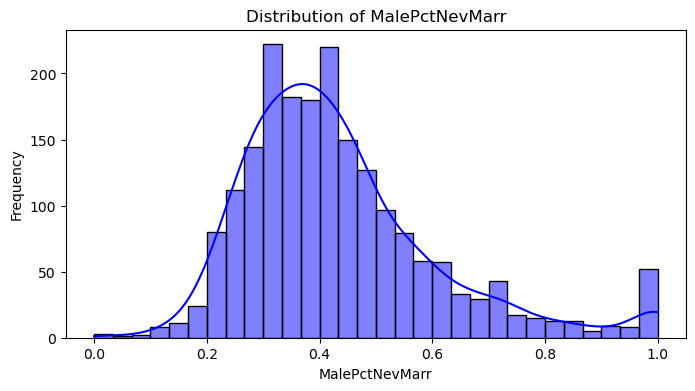

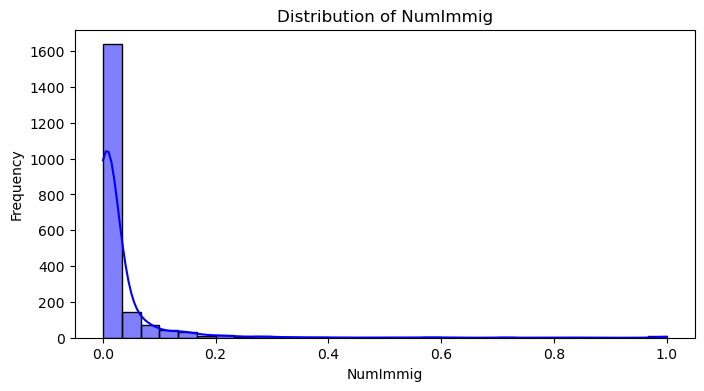

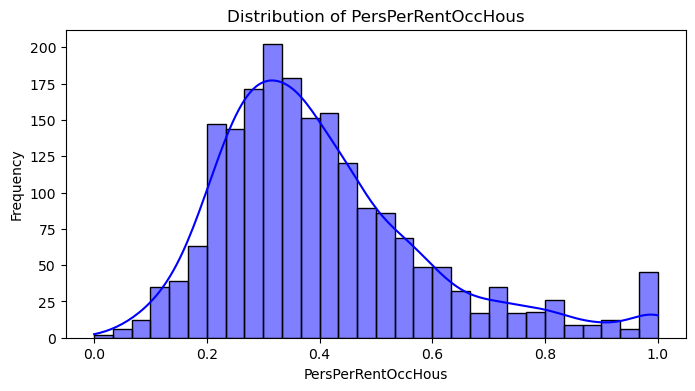

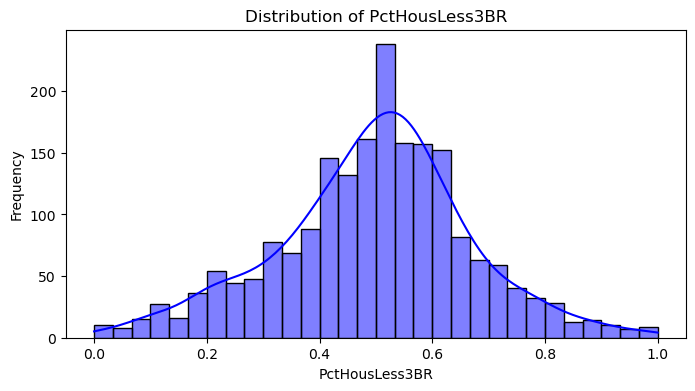

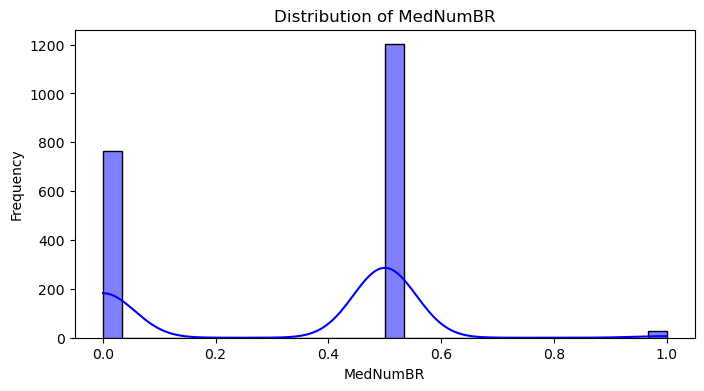

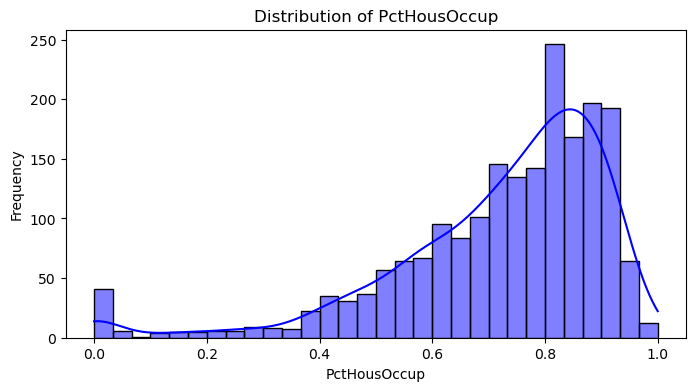

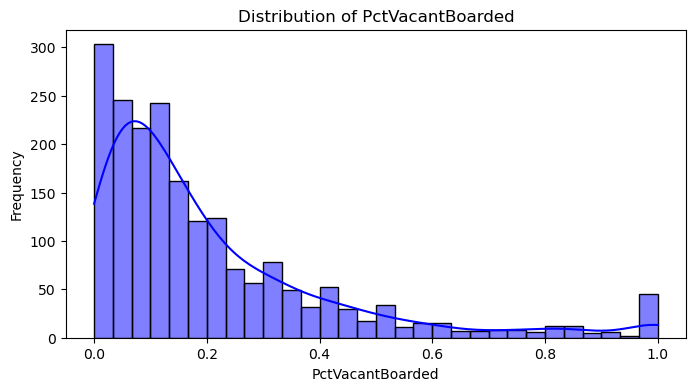

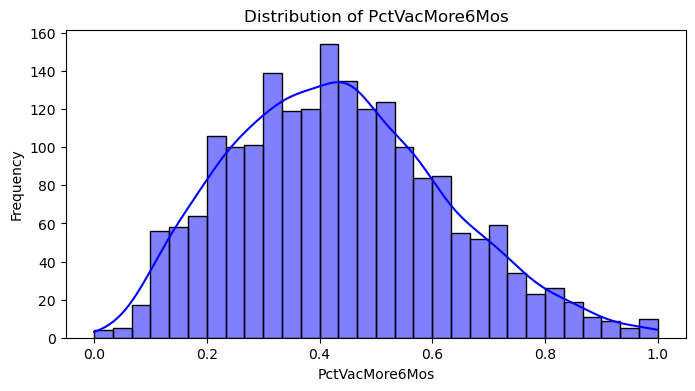

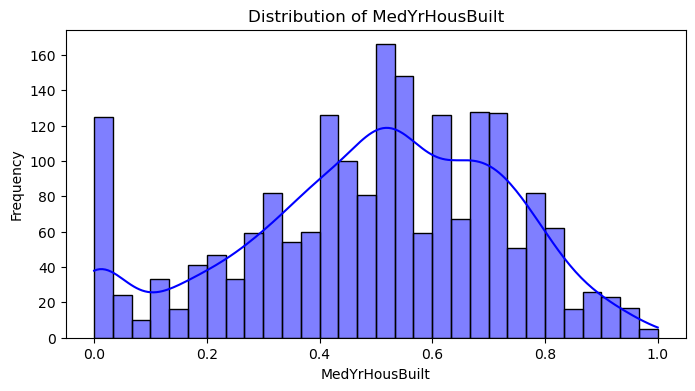

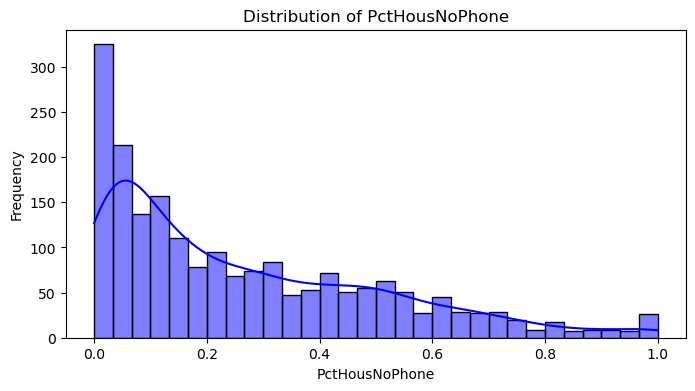

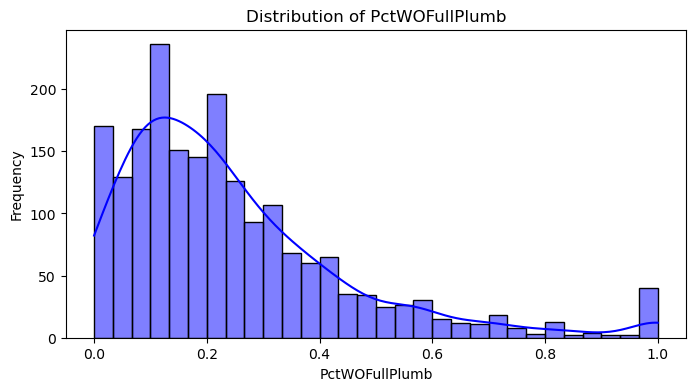

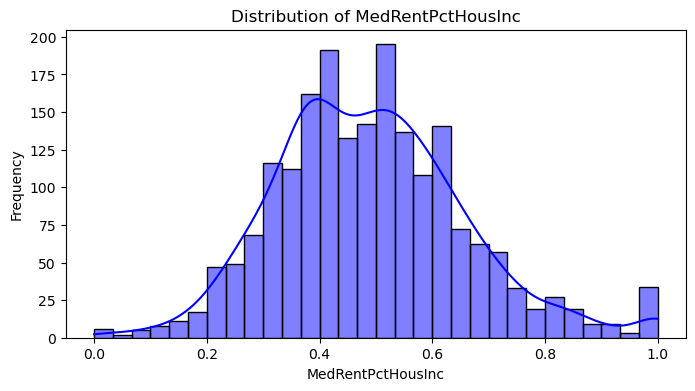

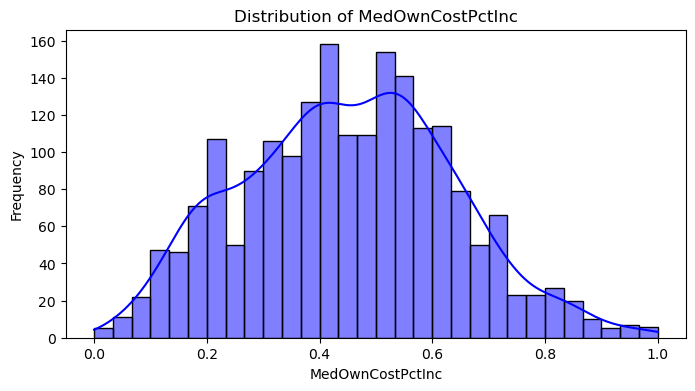

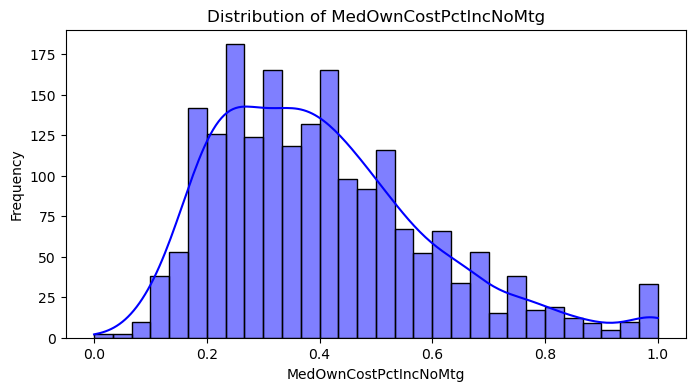

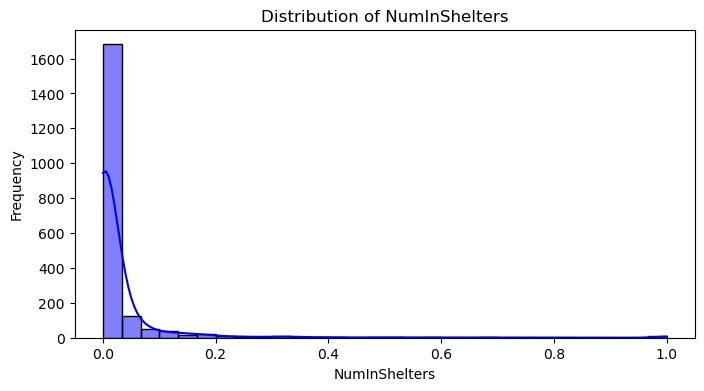

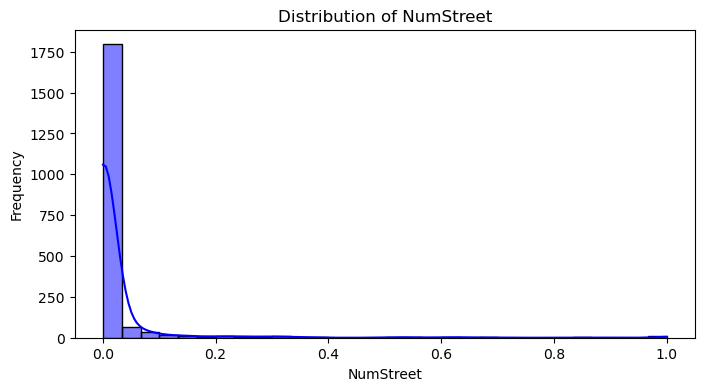

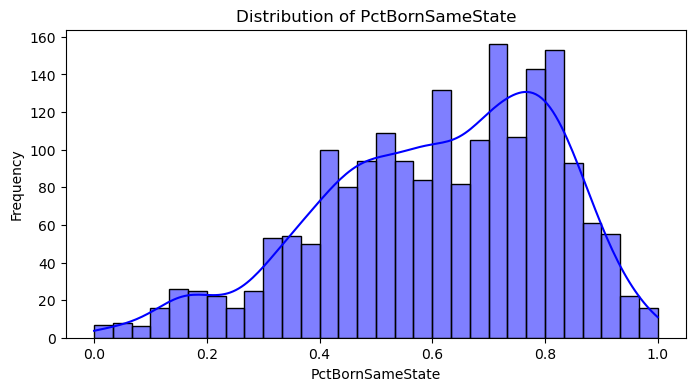

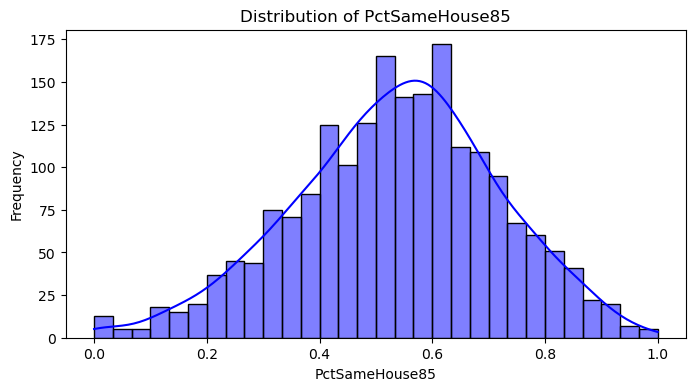

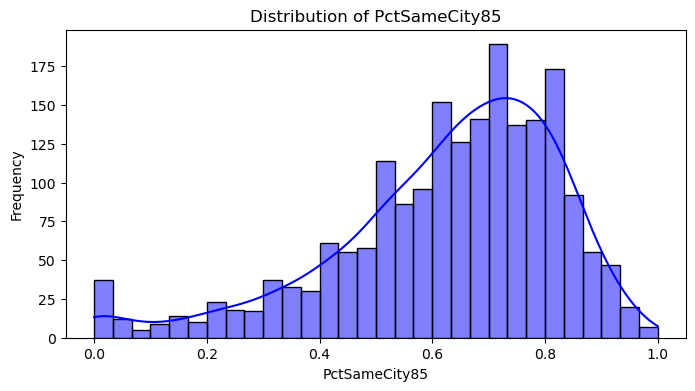

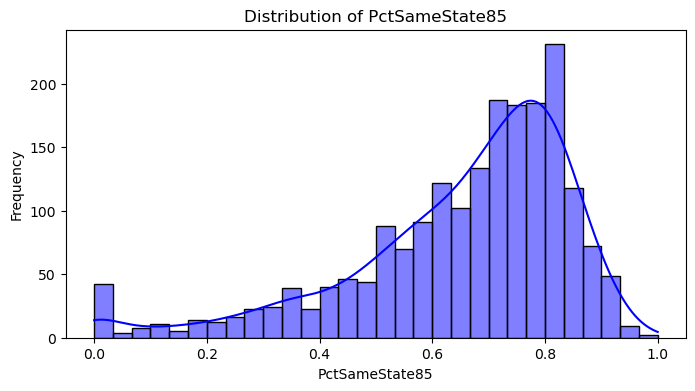

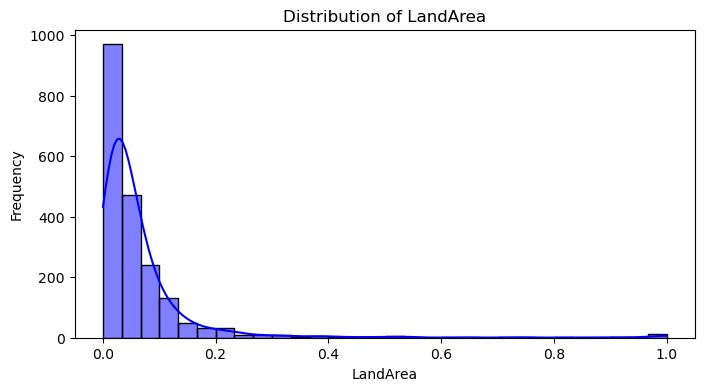

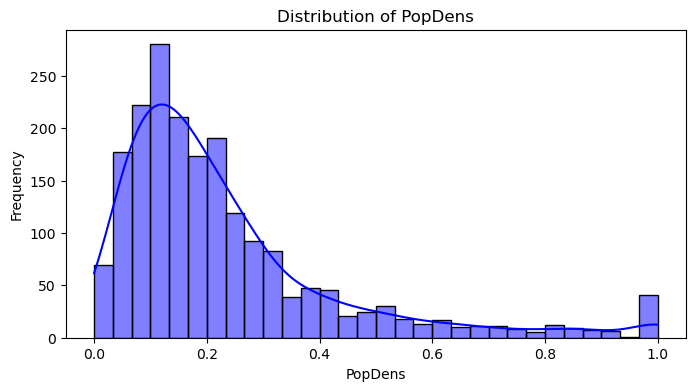

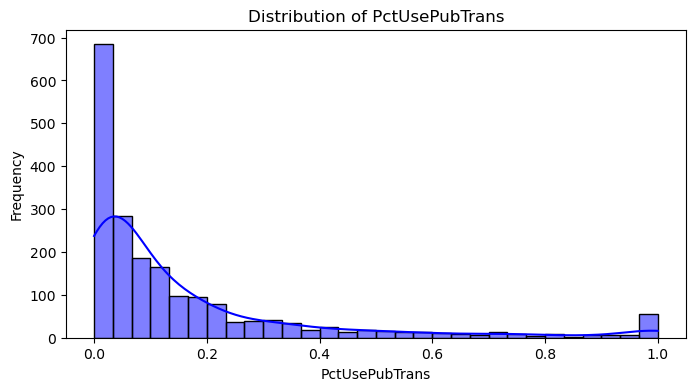

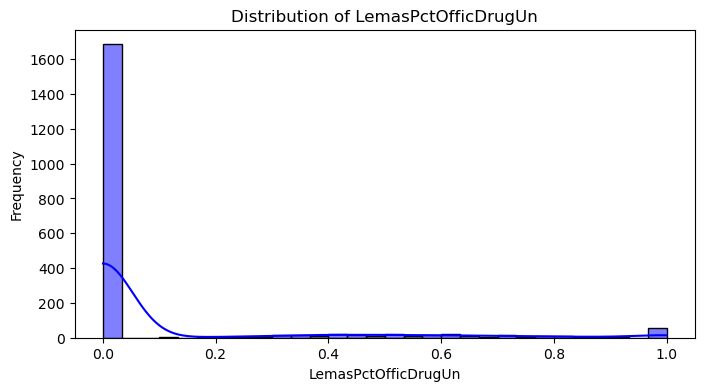

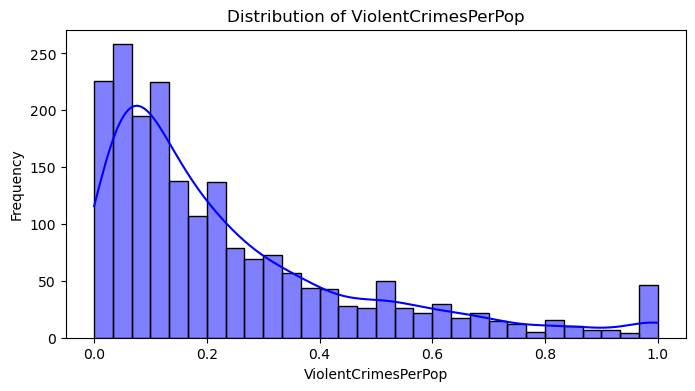

In [5]:
# Display distributions of each feature
print("Distributions for each feature:")
for feature in data.columns:
    print(f"\nFeature: {feature}")
    print(data[feature].describe())
    
    # Plot distribution for each feature (all numeric features)
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

# Outlier Removal, Normalization, and Feature Cleaning

This code performs essential preprocessing steps to clean and standardize the dataset for further analysis or modeling. The steps include:

1. **Removing Outliers**:
   - Outliers are identified and removed for each numeric feature (excluding 'ACTION') using the Interquartile Range (IQR) method.
   - This ensures that extreme values do not skew the analysis or model training.

2. **Normalizing Data**:
   - The numeric features are scaled using Min-Max Scaling to bring all feature values into a range of [0, 1].
   - This is crucial for models sensitive to feature scaling.

3. **Removing Constant Features**:
   - Features with no variability (constant values) are identified and removed as they do not contribute any useful information to the model.

4. **Saving the Processed Dataset**:
   - The cleaned and normalized dataset is saved to a CSV file (`data_final_no_outlier.csv`) for future use.

This ensures a clean, standardized dataset ready for effective analysis or machine learning workflows.

In [6]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter the data to exclude outliers
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

# Identify numeric features, excluding 'ACTION'
numeric_features = [feature for feature in data.select_dtypes(include=['int64', 'float64']).columns if feature != 'ACTION']

# Remove outliers for each numeric feature, except for 'ACTION'
data_no_outlier = data.copy()
for feature in numeric_features:
    data_no_outlier = remove_outliers_iqr(data_no_outlier, feature)
    print(f"Outliers removed for {feature}")

# Normalize the data using Min-Max Scaling
scaler = MinMaxScaler()
data_no_outlier[numeric_features] = scaler.fit_transform(data_no_outlier[numeric_features])

# Identify and remove constant features (features with no deviation)
constant_features = [col for col in data_no_outlier.columns if data_no_outlier[col].nunique() == 1]
if constant_features:
    print(f"Constant features identified and removed: {constant_features}")
    data_no_outlier.drop(columns=constant_features, inplace=True)

# Save the processed dataset to CSV
data_no_outlier.to_csv("./data_final_no_outlier.csv", index=False)
print("Data with outliers removed, normalized, and constant features removed has been saved to 'data_final_no_outlier.csv'")

Outliers removed for racepctblack
Outliers removed for racePctWhite
Outliers removed for racePctAsian
Outliers removed for pctUrban
Outliers removed for pctWFarmSelf
Outliers removed for pctWInvInc
Outliers removed for pctWPubAsst
Outliers removed for pctWRetire
Outliers removed for blackPerCap
Outliers removed for indianPerCap
Outliers removed for AsianPerCap
Outliers removed for OtherPerCap
Outliers removed for HispPerCap
Outliers removed for PctPopUnderPov
Outliers removed for PctUnemployed
Outliers removed for PctEmplManu
Outliers removed for PctEmplProfServ
Outliers removed for PctOccupManu
Outliers removed for MalePctNevMarr
Outliers removed for NumImmig
Outliers removed for PersPerRentOccHous
Outliers removed for PctHousLess3BR
Outliers removed for MedNumBR
Outliers removed for PctHousOccup
Outliers removed for PctVacantBoarded
Outliers removed for PctVacMore6Mos
Outliers removed for MedYrHousBuilt
Outliers removed for PctHousNoPhone
Outliers removed for PctWOFullPlumb
Outliers 

# Normalizing Numeric Features

We are preparing the dataset by normalizing its numeric features for further analysis or modeling. Below are the steps performed:

1. **Identifying Numeric Features**:
   - Extracting all numeric features (`int64` and `float64` types) from the dataset, excluding the target column `'ACTION'`.

2. **Normalizing Data**:
   - Applying Min-Max Scaling to scale all numeric features to a range of [0, 1], ensuring uniformity and compatibility for machine learning models.

3. **Saving Processed Data**:
   - Saving the normalized dataset (with outliers retained) to a CSV file named `data_final_with_outlier.csv`.

This ensures the dataset is standardized while retaining all original data points, including outliers.

In [7]:
# Identify numeric features, excluding 'ACTION'
numeric_features = [feature for feature in data.select_dtypes(include=['int64', 'float64']).columns if feature != 'ACTION']

# Normalize the data using Min-Max Scaling
data_with_outlier = data.copy()
scaler = MinMaxScaler()
data_with_outlier[numeric_features] = scaler.fit_transform(data_with_outlier[numeric_features])

# Save the processed dataset to CSV
data_with_outlier.to_csv("./data_final_with_outlier.csv", index=False)
print("Data with outliers retained and normalized has been saved to 'data_final_with_outlier.csv'")

Data with outliers retained and normalized has been saved to 'data_final_with_outlier.csv'


# Visualizing Normalized Features

We are comparing the distributions of numeric features (including the target column `'ACTION'`) in two datasets: one with outliers removed and the other with outliers retained. The steps include:

1. **Loading Datasets**:
   - The datasets are loaded from their respective CSV files: 
     - `data_final_no_outlier.csv` (outliers removed).
     - `data_final_with_outlier.csv` (outliers retained).

2. **Descriptive Statistics**:
   - Displaying summary statistics for each normalized feature to understand their range and distribution.

3. **Visualizing Distributions**:
   - Creating histograms with KDE (Kernel Density Estimation) plots for each feature to compare their distributions across the two datasets.

This process helps evaluate the impact of outlier removal and normalization on the features, providing insights into their suitability for further analysis or modeling.


==== Data Without Outliers ====
Numeric Features: ['racepctblack', 'racePctWhite', 'racePctAsian', 'pctUrban', 'pctWFarmSelf', 'pctWInvInc', 'pctWPubAsst', 'pctWRetire', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctUnemployed', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'MalePctNevMarr', 'NumImmig', 'PersPerRentOccHous', 'PctHousLess3BR', 'MedNumBR', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'PctBornSameState', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'LandArea', 'PopDens', 'PctUsePubTrans', 'ViolentCrimesPerPop']
Categorical Features: []

Feature: racepctblack
count    403.000000
mean       0.145310
std        0.205421
min        0.000000
25%        0.020000
50%        0.060000
75%        0.180000
max        1.000000
Name: racepctblack, dtype: float64


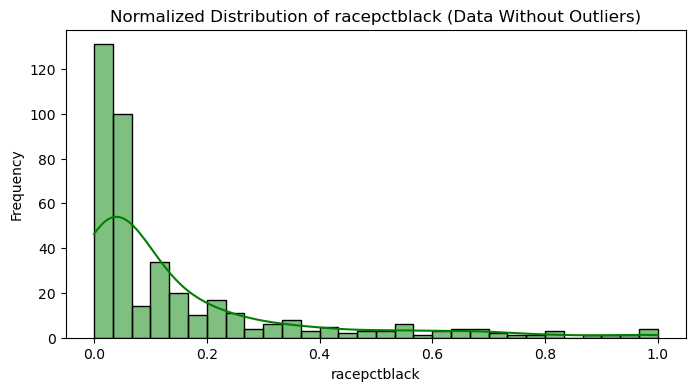


Feature: racePctWhite
count    403.000000
mean       0.820559
std        0.175308
min        0.000000
25%        0.759259
50%        0.888889
75%        0.944444
max        1.000000
Name: racePctWhite, dtype: float64


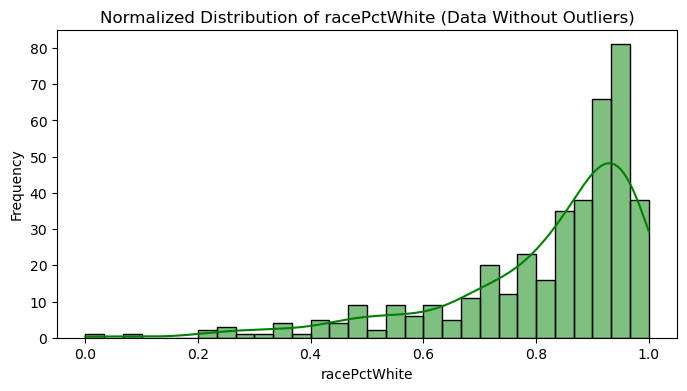


Feature: racePctAsian
count    403.000000
mean       0.177833
std        0.188586
min        0.000000
25%        0.055556
50%        0.111111
75%        0.222222
max        1.000000
Name: racePctAsian, dtype: float64


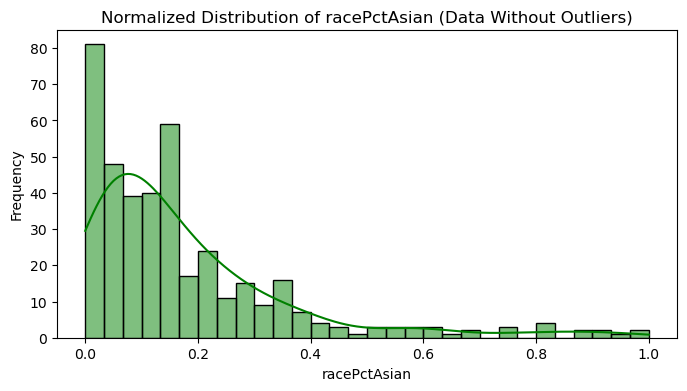


Feature: pctUrban
count    403.000000
mean       0.629950
std        0.460346
min        0.000000
25%        0.000000
50%        0.970000
75%        1.000000
max        1.000000
Name: pctUrban, dtype: float64


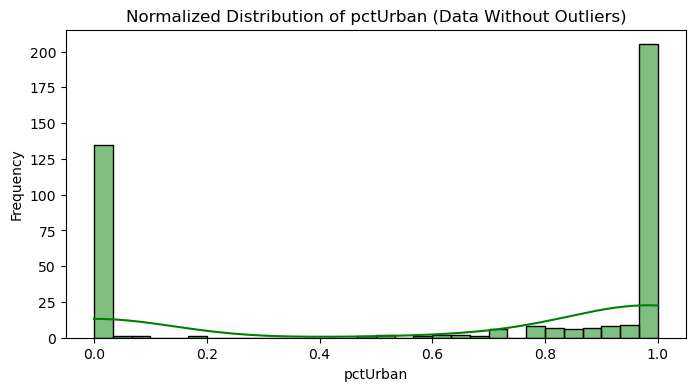


Feature: pctWFarmSelf
count    403.000000
mean       0.402056
std        0.224377
min        0.000000
25%        0.228571
50%        0.357143
75%        0.542857
max        1.000000
Name: pctWFarmSelf, dtype: float64


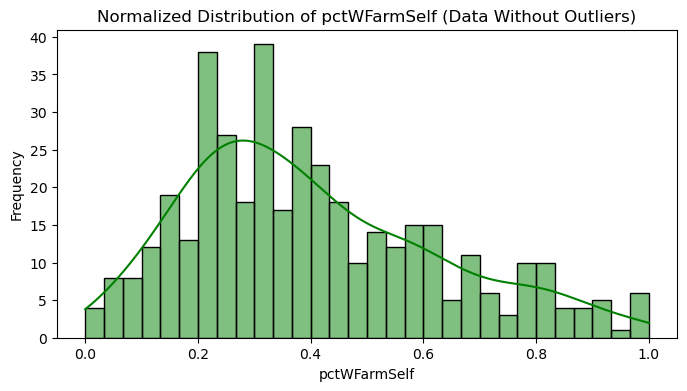


Feature: pctWInvInc
count    403.000000
mean       0.441906
std        0.198310
min        0.000000
25%        0.294118
50%        0.411765
75%        0.588235
max        1.000000
Name: pctWInvInc, dtype: float64


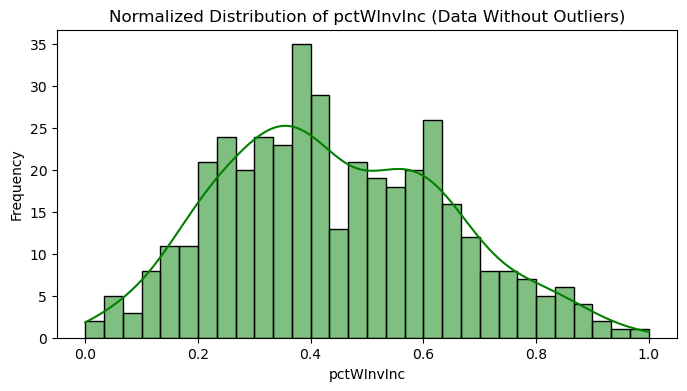


Feature: pctWPubAsst
count    403.000000
mean       0.335681
std        0.203831
min        0.000000
25%        0.176471
50%        0.294118
75%        0.455882
max        1.000000
Name: pctWPubAsst, dtype: float64


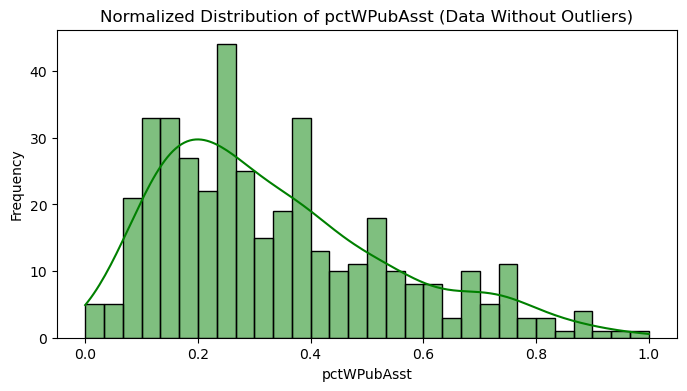


Feature: pctWRetire
count    403.000000
mean       0.523048
std        0.192555
min        0.000000
25%        0.388235
50%        0.517647
75%        0.658824
max        1.000000
Name: pctWRetire, dtype: float64


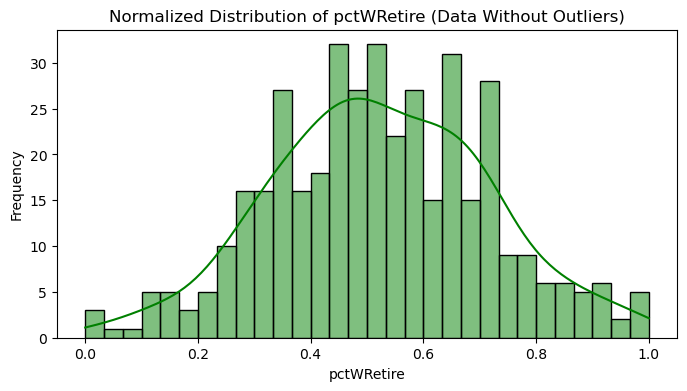


Feature: blackPerCap
count    403.000000
mean       0.415158
std        0.212853
min        0.000000
25%        0.279412
50%        0.397059
75%        0.558824
max        1.000000
Name: blackPerCap, dtype: float64


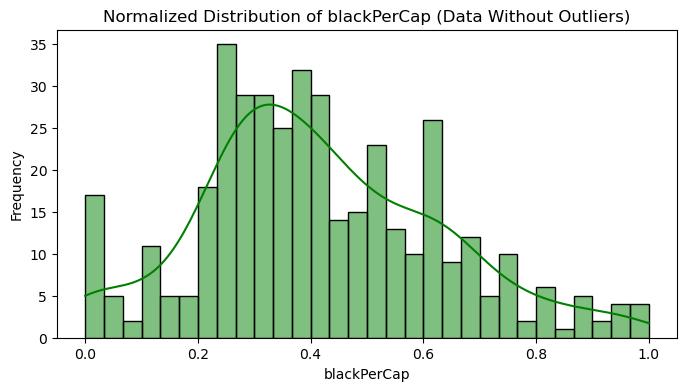


Feature: indianPerCap
count    403.000000
mean       0.354299
std        0.232587
min        0.000000
25%        0.195652
50%        0.347826
75%        0.510870
max        1.000000
Name: indianPerCap, dtype: float64


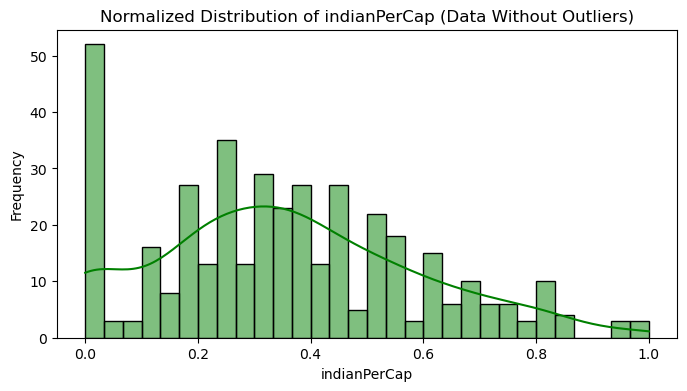


Feature: AsianPerCap
count    403.000000
mean       0.407379
std        0.215994
min        0.000000
25%        0.260870
50%        0.376812
75%        0.536232
max        1.000000
Name: AsianPerCap, dtype: float64


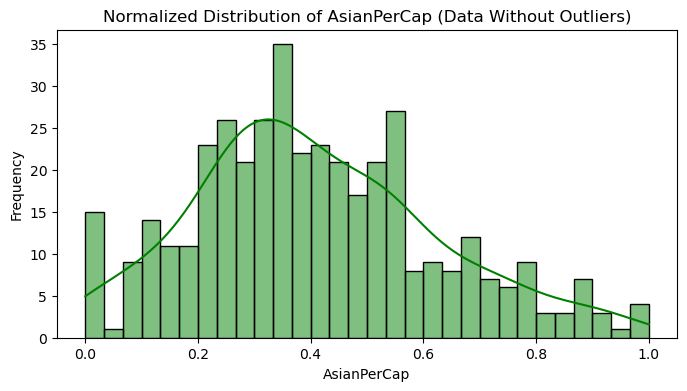


Feature: OtherPerCap
count    403.000000
mean       0.400124
std        0.237159
min        0.000000
25%        0.233333
50%        0.416667
75%        0.566667
max        1.000000
Name: OtherPerCap, dtype: float64


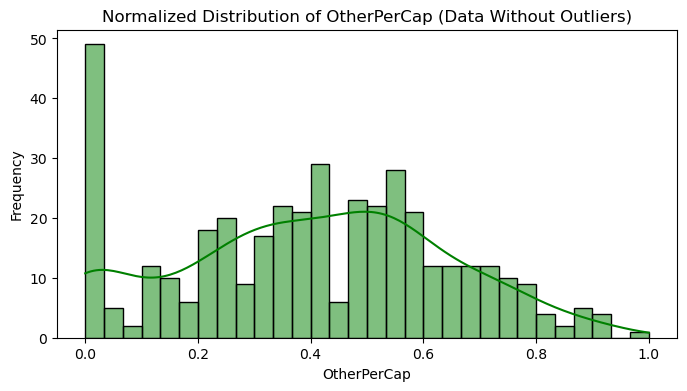


Feature: HispPerCap
count    403.000000
mean       0.503373
std        0.194321
min        0.000000
25%        0.366197
50%        0.478873
75%        0.619718
max        1.000000
Name: HispPerCap, dtype: float64


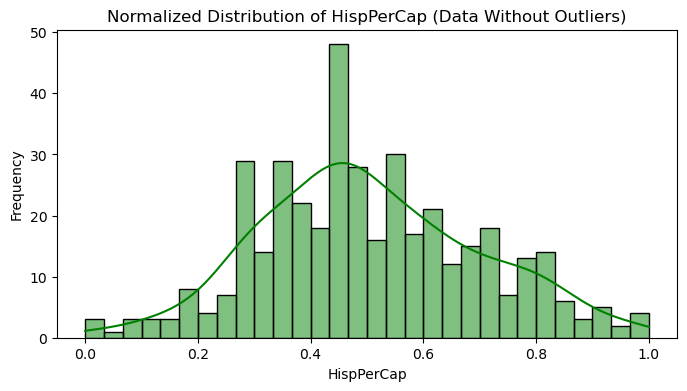


Feature: PctPopUnderPov
count    403.000000
mean       0.327238
std        0.226208
min        0.000000
25%        0.153846
50%        0.261538
75%        0.446154
max        1.000000
Name: PctPopUnderPov, dtype: float64


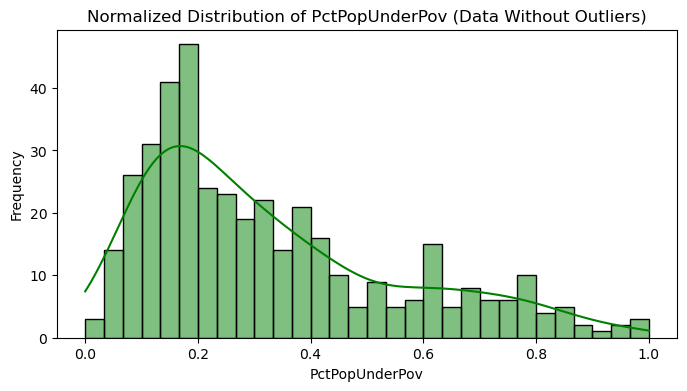


Feature: PctUnemployed
count    403.000000
mean       0.351304
std        0.205487
min        0.000000
25%        0.191781
50%        0.328767
75%        0.465753
max        1.000000
Name: PctUnemployed, dtype: float64


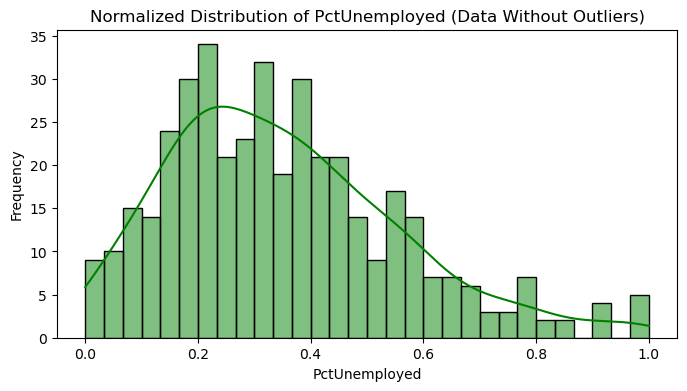


Feature: PctEmplManu
count    403.000000
mean       0.488975
std        0.209223
min        0.000000
25%        0.340909
50%        0.465909
75%        0.636364
max        1.000000
Name: PctEmplManu, dtype: float64


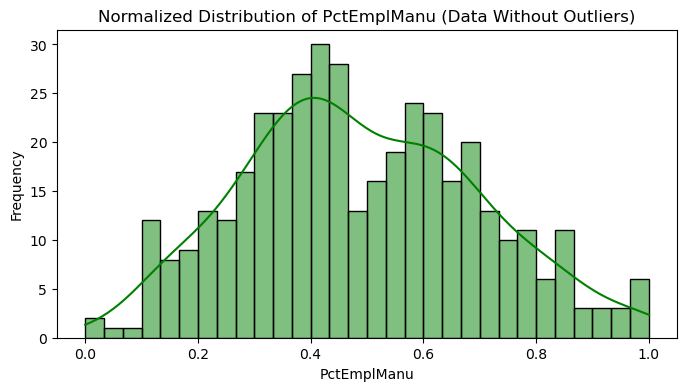


Feature: PctEmplProfServ
count    403.000000
mean       0.428641
std        0.192259
min        0.000000
25%        0.287879
50%        0.393939
75%        0.545455
max        1.000000
Name: PctEmplProfServ, dtype: float64


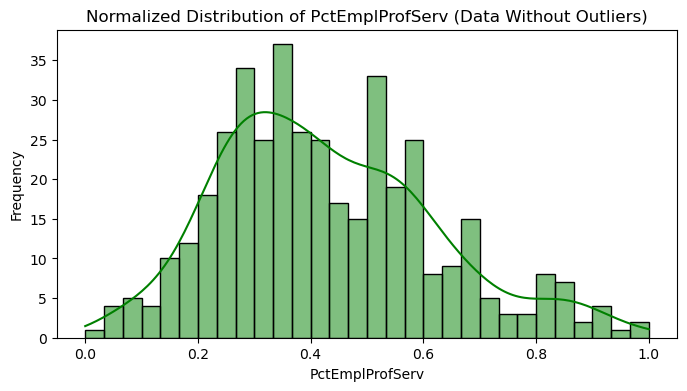


Feature: PctOccupManu
count    403.000000
mean       0.489970
std        0.205125
min        0.000000
25%        0.337349
50%        0.469880
75%        0.620482
max        1.000000
Name: PctOccupManu, dtype: float64


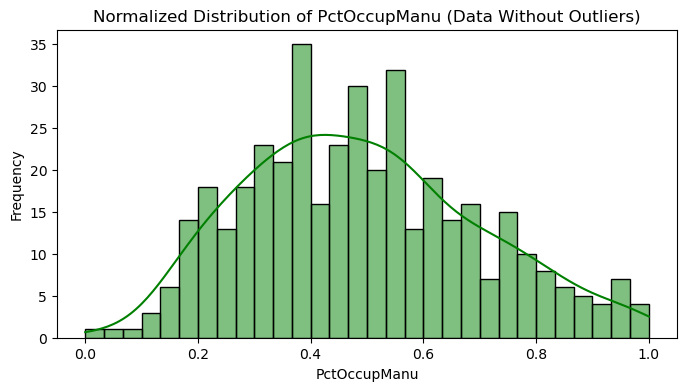


Feature: MalePctNevMarr
count    403.000000
mean       0.354360
std        0.181412
min        0.000000
25%        0.228070
50%        0.333333
75%        0.438596
max        1.000000
Name: MalePctNevMarr, dtype: float64


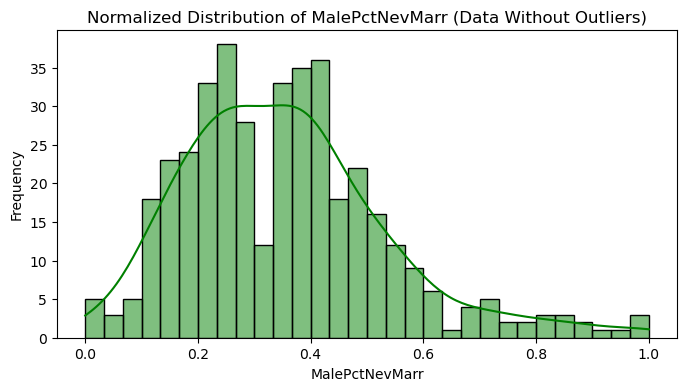


Feature: NumImmig
count    403.000000
mean       0.082382
std        0.145110
min        0.000000
25%        0.000000
50%        0.000000
75%        0.200000
max        1.000000
Name: NumImmig, dtype: float64


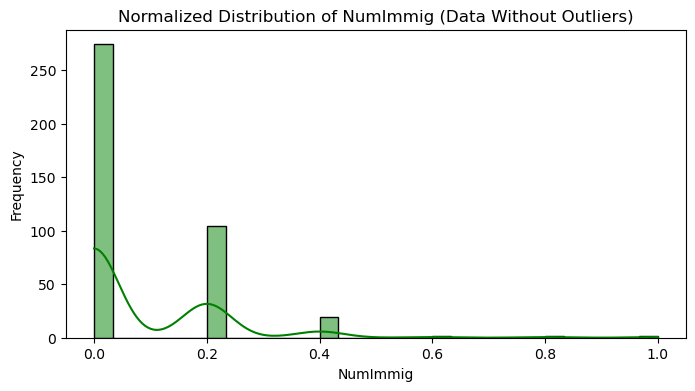


Feature: PersPerRentOccHous
count    403.000000
mean       0.451394
std        0.184246
min        0.000000
25%        0.323529
50%        0.441176
75%        0.558824
max        1.000000
Name: PersPerRentOccHous, dtype: float64


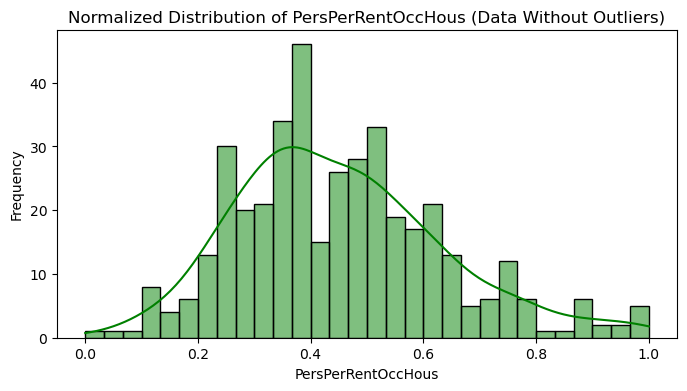


Feature: PctHousLess3BR
count    403.000000
mean       0.441220
std        0.178245
min        0.000000
25%        0.318841
50%        0.463768
75%        0.565217
max        1.000000
Name: PctHousLess3BR, dtype: float64


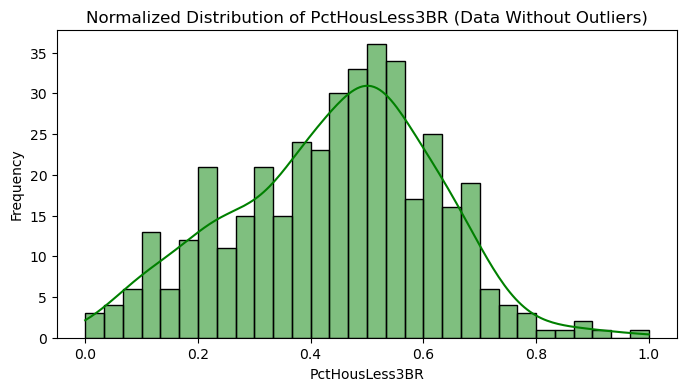


Feature: MedNumBR
count    403.000000
mean       0.808933
std        0.393630
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: MedNumBR, dtype: float64


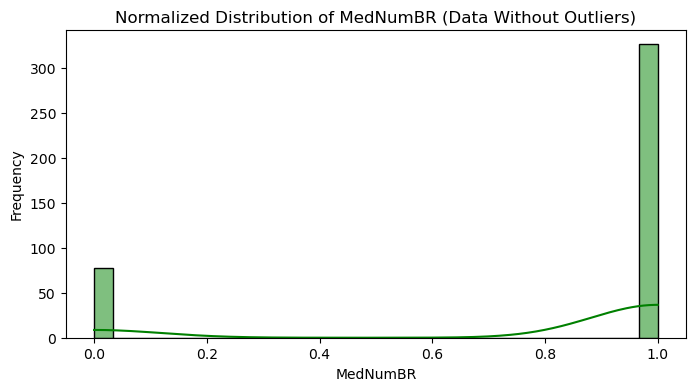


Feature: PctHousOccup
count    403.000000
mean       0.696981
std        0.201733
min        0.000000
25%        0.591667
50%        0.750000
75%        0.850000
max        1.000000
Name: PctHousOccup, dtype: float64


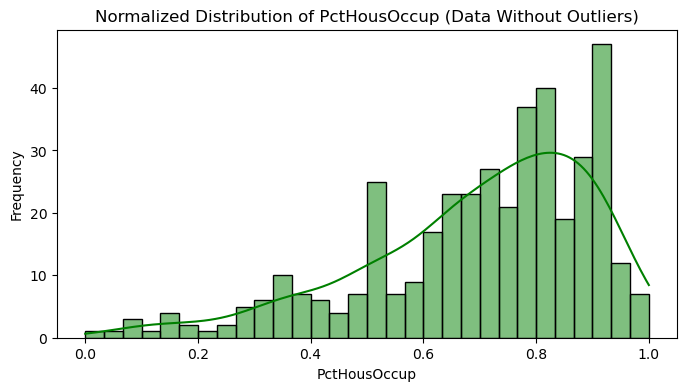


Feature: PctVacantBoarded
count    403.000000
mean       0.266353
std        0.228533
min        0.000000
25%        0.085106
50%        0.212766
75%        0.382979
max        1.000000
Name: PctVacantBoarded, dtype: float64


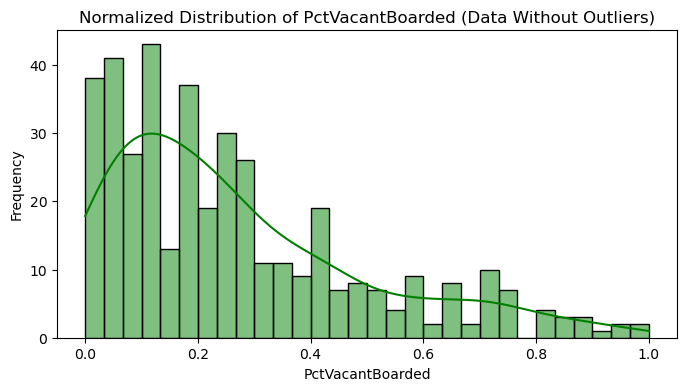


Feature: PctVacMore6Mos
count    403.000000
mean       0.426020
std        0.206731
min        0.000000
25%        0.279070
50%        0.418605
75%        0.569767
max        1.000000
Name: PctVacMore6Mos, dtype: float64


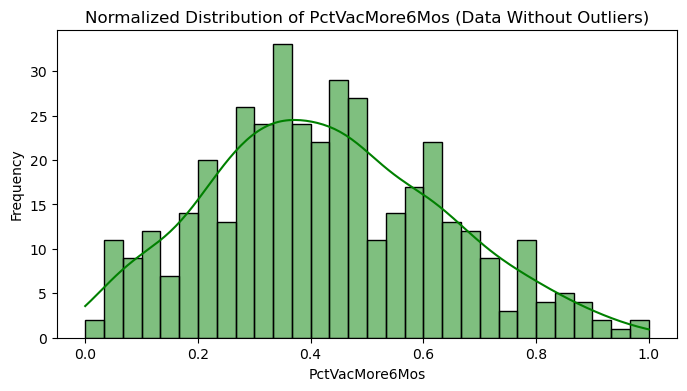


Feature: MedYrHousBuilt
count    403.000000
mean       0.537609
std        0.208950
min        0.000000
25%        0.395833
50%        0.541667
75%        0.718750
max        1.000000
Name: MedYrHousBuilt, dtype: float64


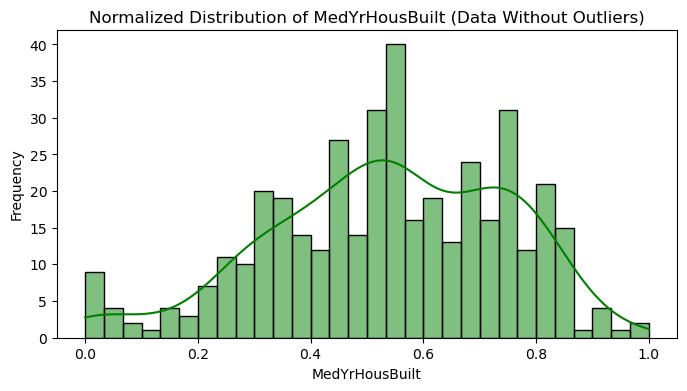


Feature: PctHousNoPhone
count    403.000000
mean       0.255675
std        0.242158
min        0.000000
25%        0.061728
50%        0.160494
75%        0.382716
max        1.000000
Name: PctHousNoPhone, dtype: float64


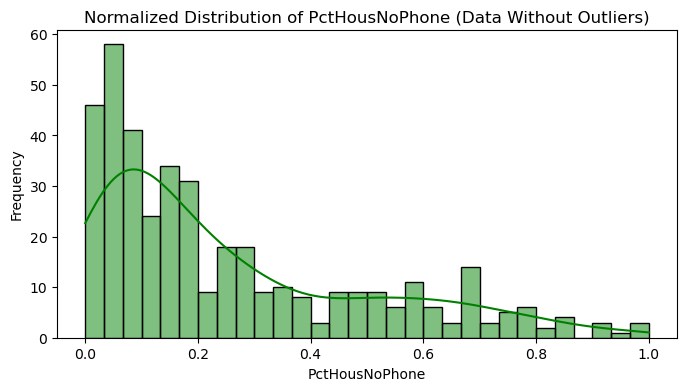


Feature: PctWOFullPlumb
count    403.000000
mean       0.312699
std        0.227955
min        0.000000
25%        0.133929
50%        0.285714
75%        0.446429
max        1.000000
Name: PctWOFullPlumb, dtype: float64


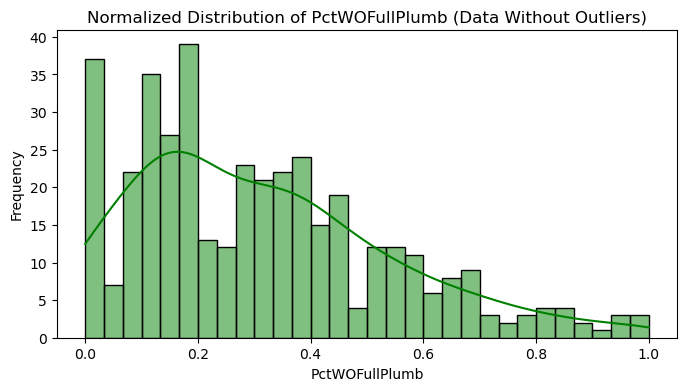


Feature: MedRentPctHousInc
count    403.000000
mean       0.440343
std        0.172807
min        0.000000
25%        0.319444
50%        0.430556
75%        0.555556
max        1.000000
Name: MedRentPctHousInc, dtype: float64


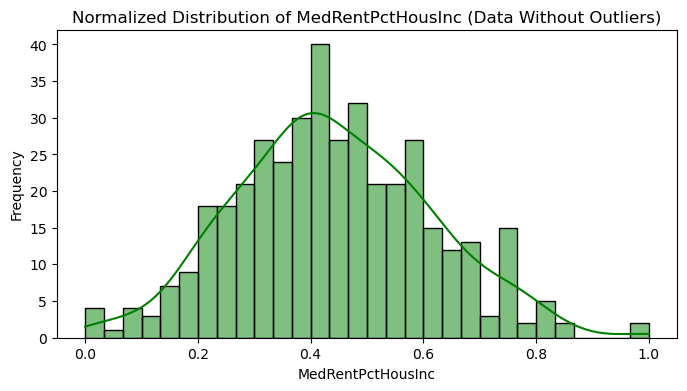


Feature: MedOwnCostPctInc
count    403.000000
mean       0.441599
std        0.211299
min        0.000000
25%        0.261905
50%        0.416667
75%        0.607143
max        1.000000
Name: MedOwnCostPctInc, dtype: float64


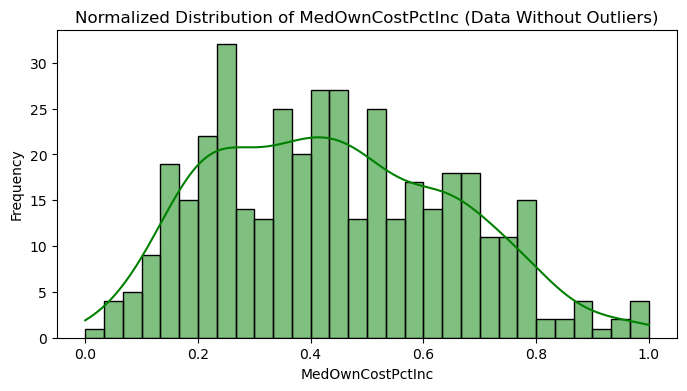


Feature: MedOwnCostPctIncNoMtg
count    403.000000
mean       0.360205
std        0.197168
min        0.000000
25%        0.206250
50%        0.312500
75%        0.475000
max        1.000000
Name: MedOwnCostPctIncNoMtg, dtype: float64


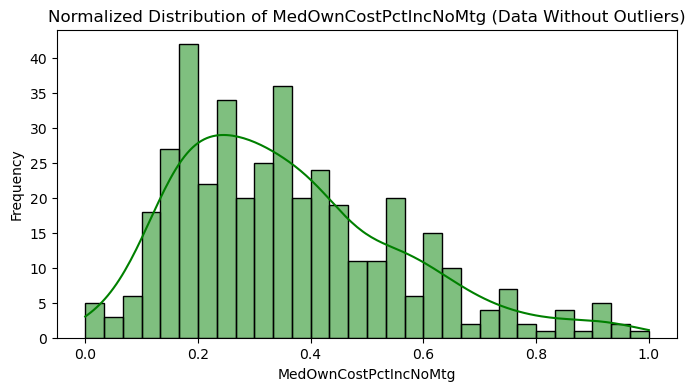


Feature: NumInShelters
count    403.000000
mean       0.105459
std        0.245699
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: NumInShelters, dtype: float64


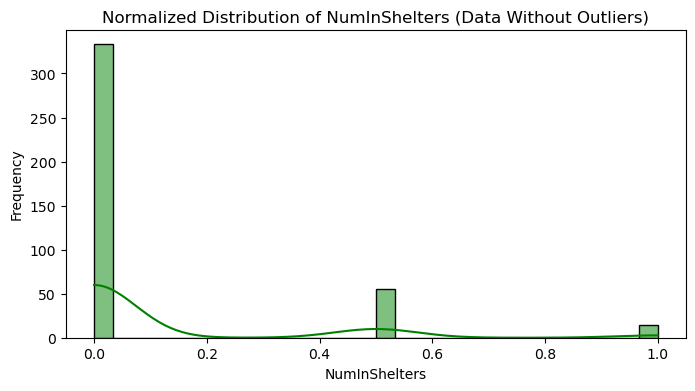


Feature: PctBornSameState
count    403.000000
mean       0.628741
std        0.195236
min        0.000000
25%        0.518519
50%        0.666667
75%        0.777778
max        1.000000
Name: PctBornSameState, dtype: float64


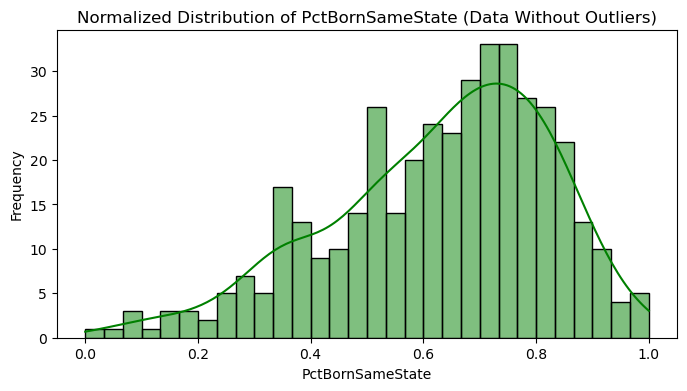


Feature: PctSameHouse85
count    403.000000
mean       0.511469
std        0.192032
min        0.000000
25%        0.378049
50%        0.512195
75%        0.640244
max        1.000000
Name: PctSameHouse85, dtype: float64


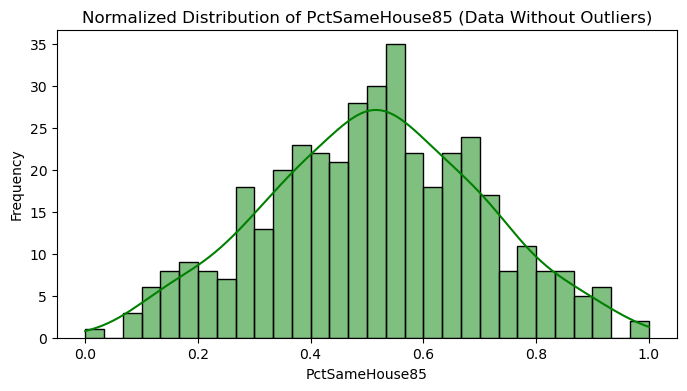


Feature: PctSameCity85
count    403.000000
mean       0.605169
std        0.201289
min        0.000000
25%        0.480519
50%        0.623377
75%        0.759740
max        1.000000
Name: PctSameCity85, dtype: float64


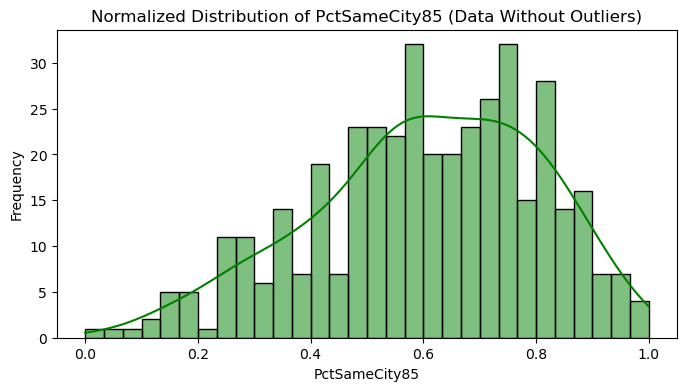


Feature: PctSameState85
count    403.000000
mean       0.651754
std        0.216399
min        0.000000
25%        0.522388
50%        0.701493
75%        0.820896
max        1.000000
Name: PctSameState85, dtype: float64


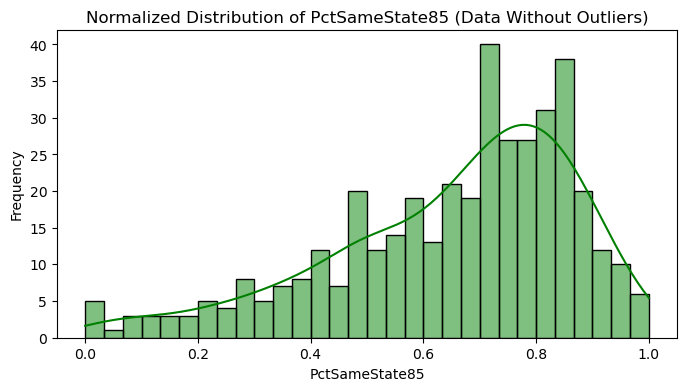


Feature: LandArea
count    403.000000
mean       0.345120
std        0.229122
min        0.000000
25%        0.166667
50%        0.250000
75%        0.500000
max        1.000000
Name: LandArea, dtype: float64


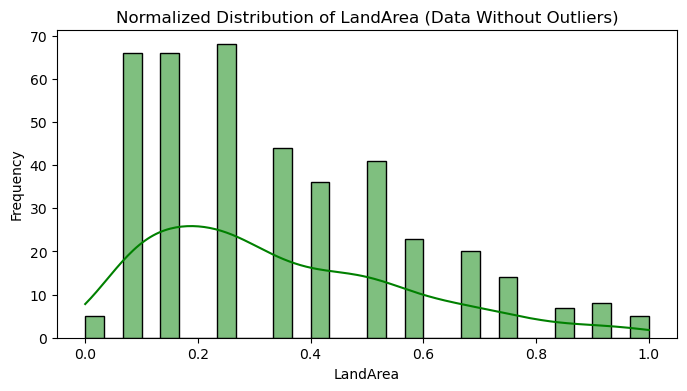


Feature: PopDens
count    403.000000
mean       0.324023
std        0.217570
min        0.000000
25%        0.162791
50%        0.279070
75%        0.488372
max        1.000000
Name: PopDens, dtype: float64


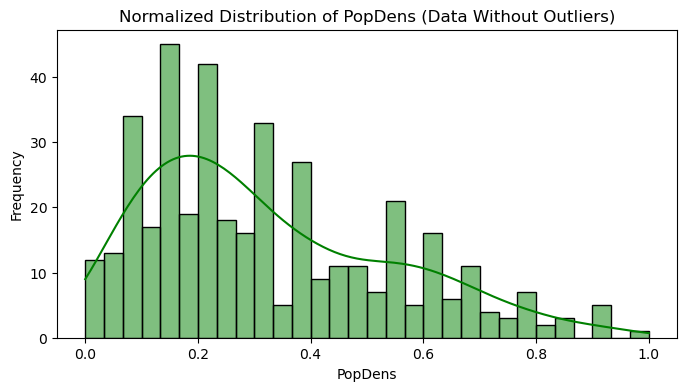


Feature: PctUsePubTrans
count    403.000000
mean       0.224566
std        0.232826
min        0.000000
25%        0.035714
50%        0.142857
75%        0.321429
max        1.000000
Name: PctUsePubTrans, dtype: float64


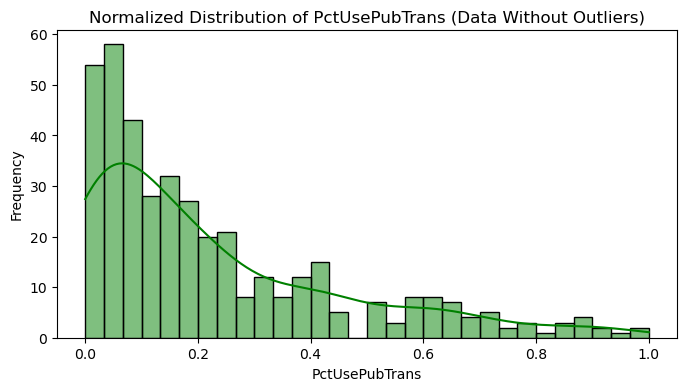


Feature: ViolentCrimesPerPop
count    403.000000
mean       0.314498
std        0.225481
min        0.000000
25%        0.142857
50%        0.257143
75%        0.428571
max        1.000000
Name: ViolentCrimesPerPop, dtype: float64


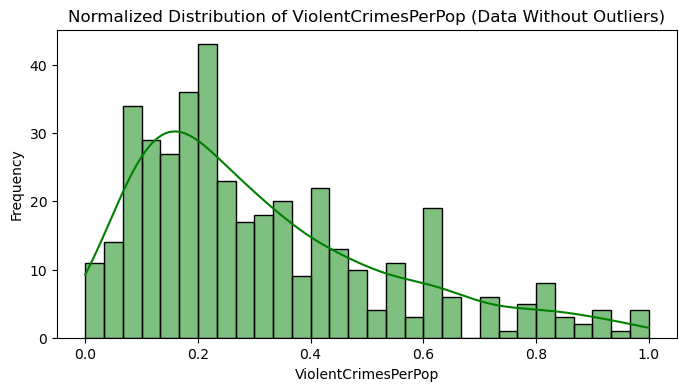


==== Data With Outliers ====
Numeric Features: ['racepctblack', 'racePctWhite', 'racePctAsian', 'pctUrban', 'pctWFarmSelf', 'pctWInvInc', 'pctWPubAsst', 'pctWRetire', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctUnemployed', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'MalePctNevMarr', 'NumImmig', 'PersPerRentOccHous', 'PctHousLess3BR', 'MedNumBR', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctBornSameState', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'LandArea', 'PopDens', 'PctUsePubTrans', 'LemasPctOfficDrugUn', 'ViolentCrimesPerPop']
Categorical Features: []

Feature: racepctblack
count    1994.000000
mean        0.179629
std         0.253442
min         0.000000
25%         0.020000
50%         0.060000
75%         0.230000
max         1.000000
Name: race

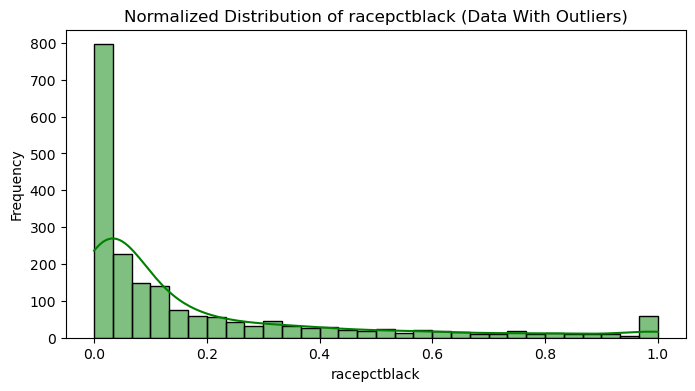


Feature: racePctWhite
count    1994.000000
mean        0.753716
std         0.244039
min         0.000000
25%         0.630000
50%         0.850000
75%         0.940000
max         1.000000
Name: racePctWhite, dtype: float64


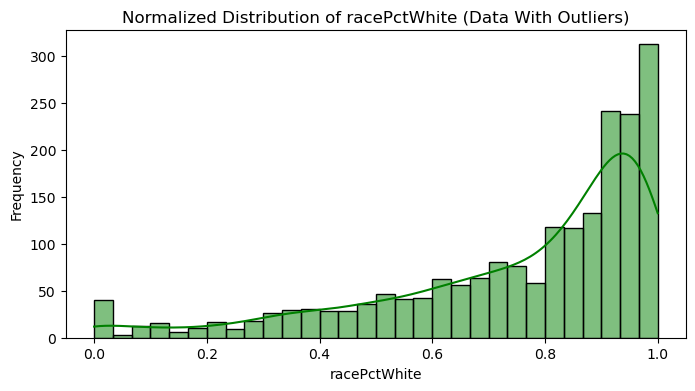


Feature: racePctAsian
count    1994.000000
mean        0.153681
std         0.208877
min         0.000000
25%         0.040000
50%         0.070000
75%         0.170000
max         1.000000
Name: racePctAsian, dtype: float64


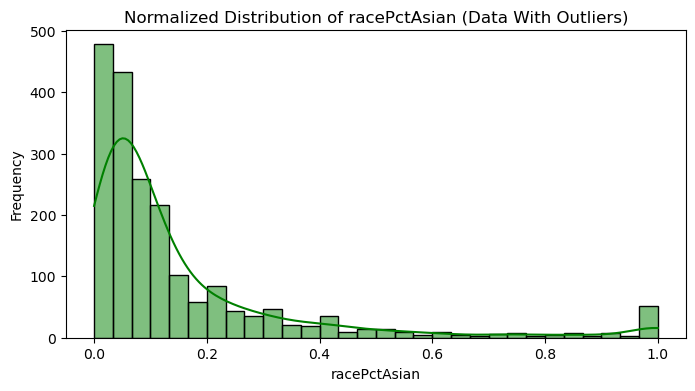


Feature: pctUrban
count    1994.000000
mean        0.696269
std         0.444811
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: pctUrban, dtype: float64


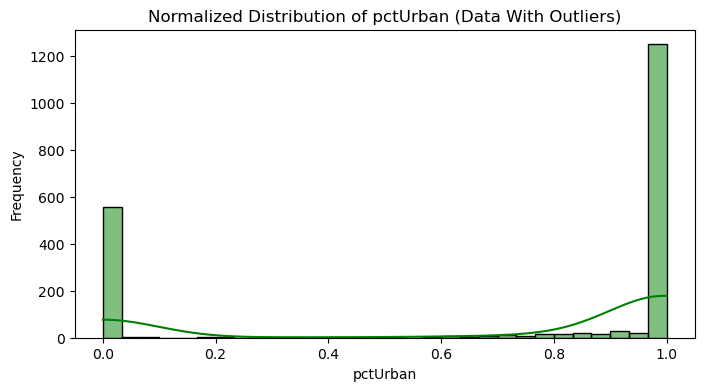


Feature: pctWFarmSelf
count    1994.000000
mean        0.291570
std         0.204108
min         0.000000
25%         0.160000
50%         0.230000
75%         0.370000
max         1.000000
Name: pctWFarmSelf, dtype: float64


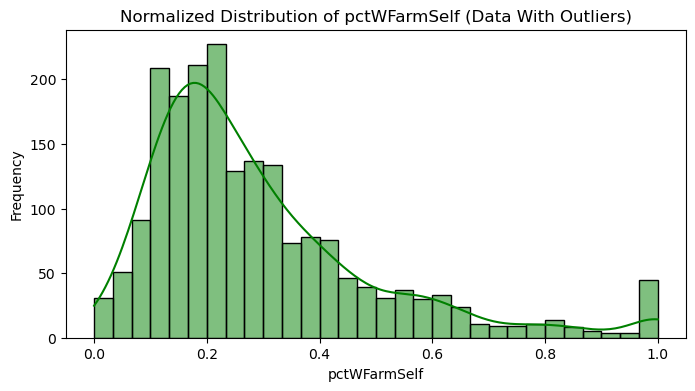


Feature: pctWInvInc
count    1994.000000
mean        0.495687
std         0.178071
min         0.000000
25%         0.370000
50%         0.480000
75%         0.620000
max         1.000000
Name: pctWInvInc, dtype: float64


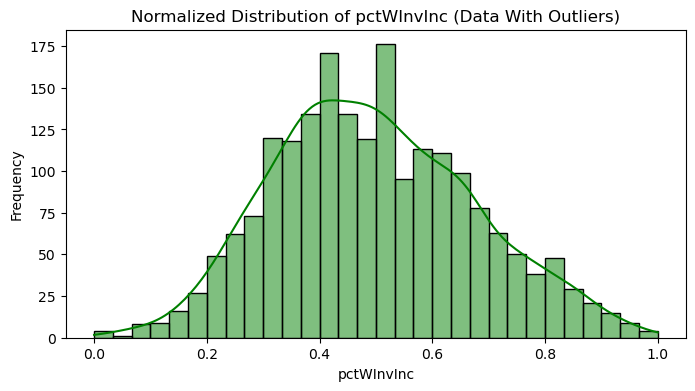


Feature: pctWPubAsst
count    1994.000000
mean        0.317778
std         0.222137
min         0.000000
25%         0.142500
50%         0.260000
75%         0.440000
max         1.000000
Name: pctWPubAsst, dtype: float64


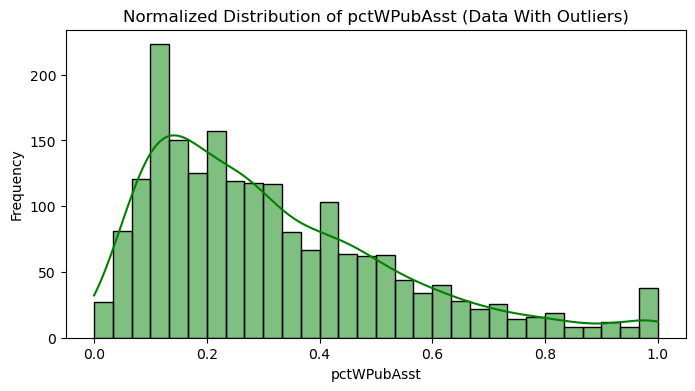


Feature: pctWRetire
count    1994.000000
mean        0.479248
std         0.167564
min         0.000000
25%         0.360000
50%         0.470000
75%         0.580000
max         1.000000
Name: pctWRetire, dtype: float64


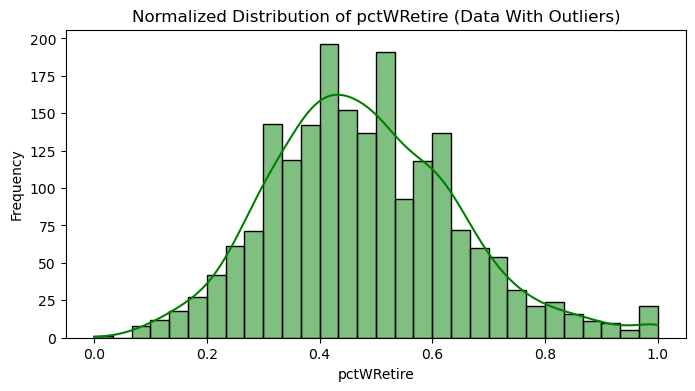


Feature: blackPerCap
count    1994.000000
mean        0.291098
std         0.171593
min         0.000000
25%         0.172500
50%         0.250000
75%         0.380000
max         1.000000
Name: blackPerCap, dtype: float64


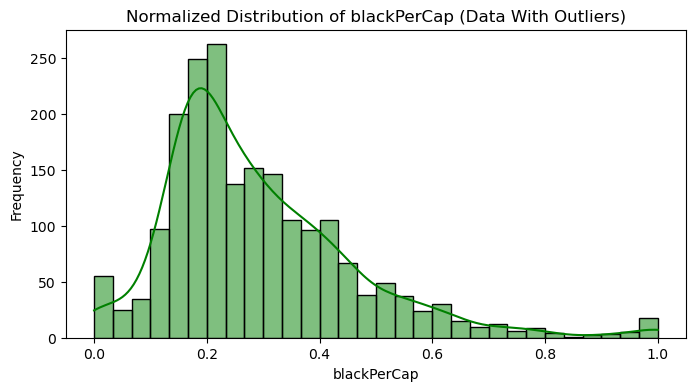


Feature: indianPerCap
count    1994.000000
mean        0.203506
std         0.164775
min         0.000000
25%         0.110000
50%         0.170000
75%         0.250000
max         1.000000
Name: indianPerCap, dtype: float64


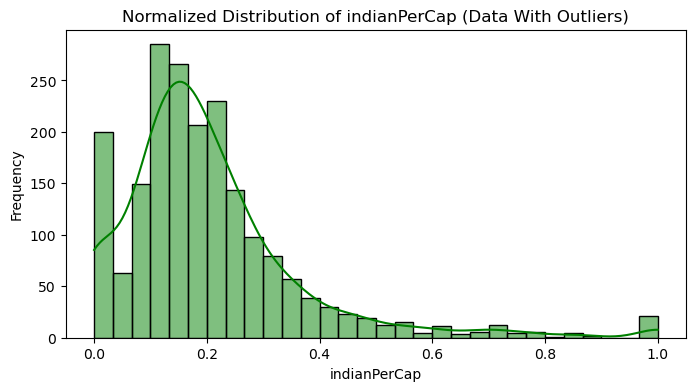


Feature: AsianPerCap
count    1994.000000
mean        0.322357
std         0.195411
min         0.000000
25%         0.190000
50%         0.280000
75%         0.400000
max         1.000000
Name: AsianPerCap, dtype: float64


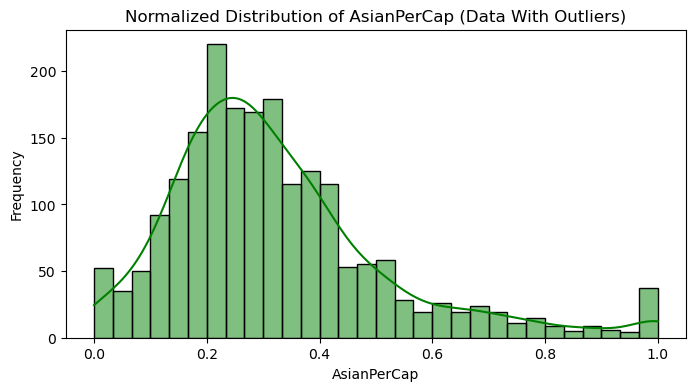


Feature: OtherPerCap
count    1994.000000
mean        0.284742
std         0.190960
min         0.000000
25%         0.170000
50%         0.250000
75%         0.360000
max         1.000000
Name: OtherPerCap, dtype: float64


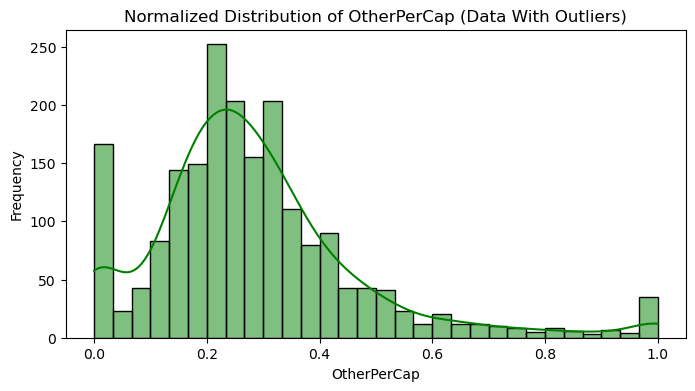


Feature: HispPerCap
count    1994.000000
mean        0.386279
std         0.183081
min         0.000000
25%         0.260000
50%         0.345000
75%         0.480000
max         1.000000
Name: HispPerCap, dtype: float64


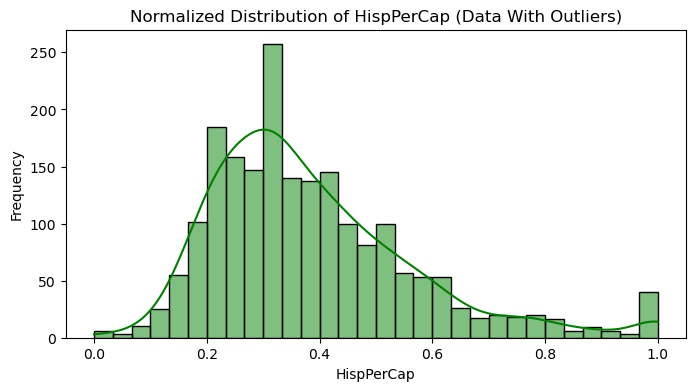


Feature: PctPopUnderPov
count    1994.000000
mean        0.303024
std         0.228474
min         0.000000
25%         0.110000
50%         0.250000
75%         0.450000
max         1.000000
Name: PctPopUnderPov, dtype: float64


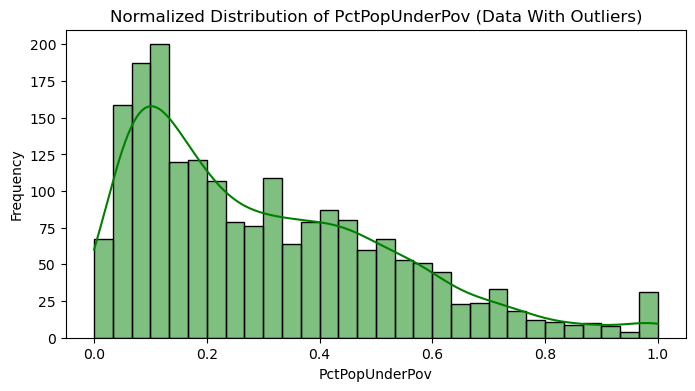


Feature: PctUnemployed
count    1994.000000
mean        0.363531
std         0.202171
min         0.000000
25%         0.220000
50%         0.320000
75%         0.480000
max         1.000000
Name: PctUnemployed, dtype: float64


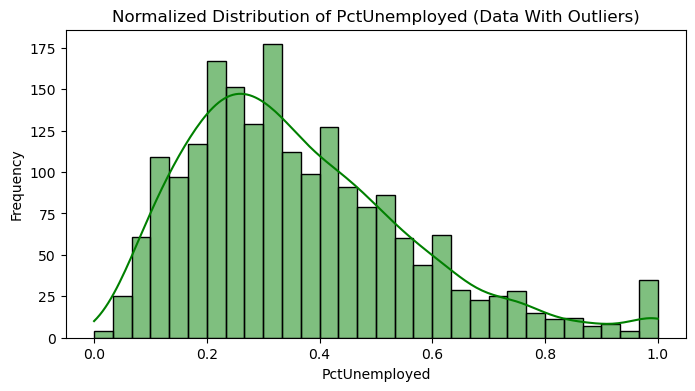


Feature: PctEmplManu
count    1994.000000
mean        0.396384
std         0.202386
min         0.000000
25%         0.250000
50%         0.370000
75%         0.520000
max         1.000000
Name: PctEmplManu, dtype: float64


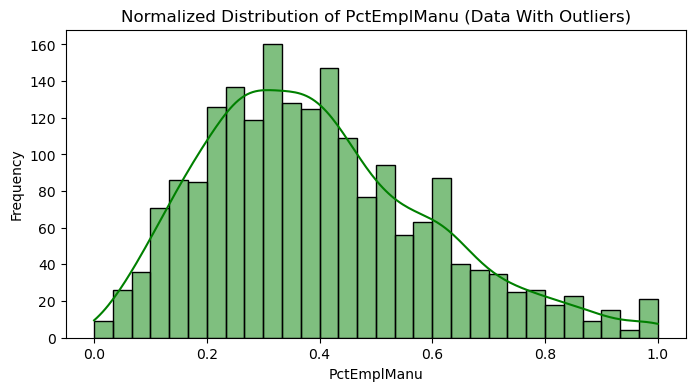


Feature: PctEmplProfServ
count    1994.000000
mean        0.440597
std         0.175457
min         0.000000
25%         0.320000
50%         0.410000
75%         0.530000
max         1.000000
Name: PctEmplProfServ, dtype: float64


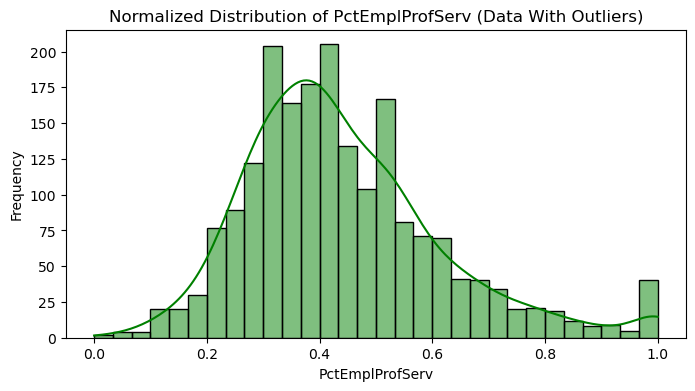


Feature: PctOccupManu
count    1994.000000
mean        0.391224
std         0.198922
min         0.000000
25%         0.240000
50%         0.370000
75%         0.510000
max         1.000000
Name: PctOccupManu, dtype: float64


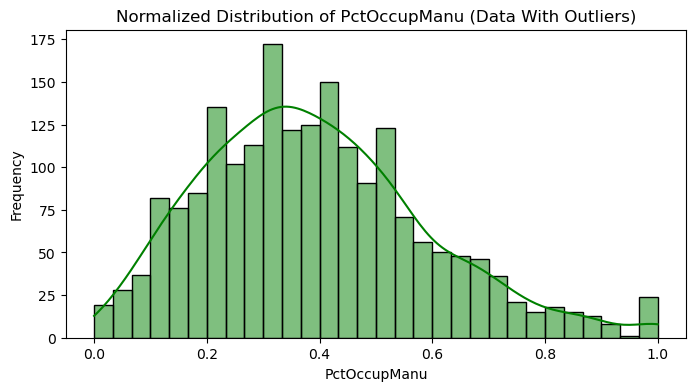


Feature: MalePctNevMarr
count    1994.000000
mean        0.434453
std         0.175437
min         0.000000
25%         0.310000
50%         0.400000
75%         0.500000
max         1.000000
Name: MalePctNevMarr, dtype: float64


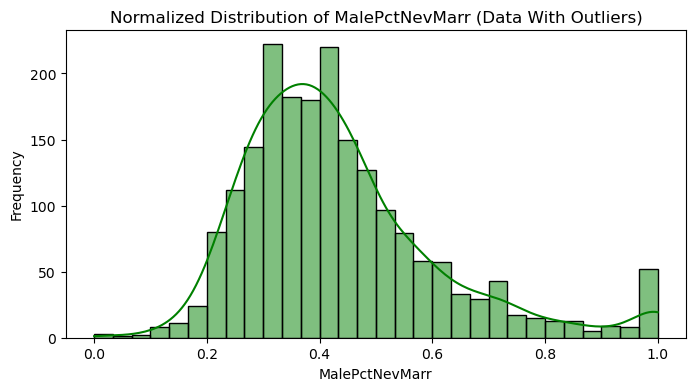


Feature: NumImmig
count    1994.000000
mean        0.030060
std         0.087189
min         0.000000
25%         0.000000
50%         0.010000
75%         0.020000
max         1.000000
Name: NumImmig, dtype: float64


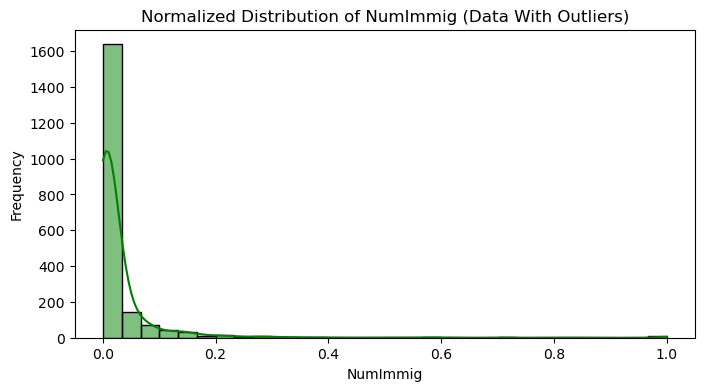


Feature: PersPerRentOccHous
count    1994.000000
mean        0.404097
std         0.189301
min         0.000000
25%         0.270000
50%         0.360000
75%         0.490000
max         1.000000
Name: PersPerRentOccHous, dtype: float64


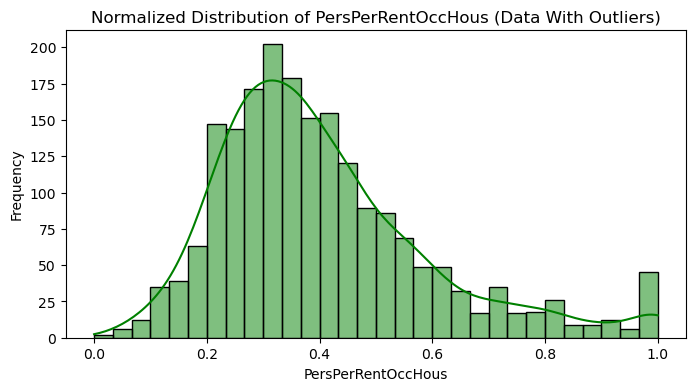


Feature: PctHousLess3BR
count    1994.000000
mean        0.495186
std         0.172508
min         0.000000
25%         0.400000
50%         0.510000
75%         0.600000
max         1.000000
Name: PctHousLess3BR, dtype: float64


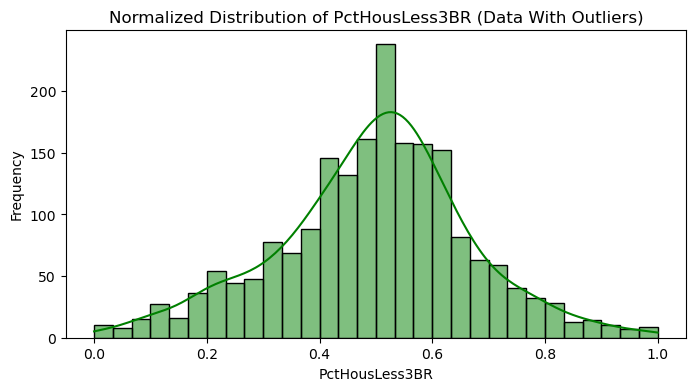


Feature: MedNumBR
count    1994.000000
mean        0.314694
std         0.255182
min         0.000000
25%         0.000000
50%         0.500000
75%         0.500000
max         1.000000
Name: MedNumBR, dtype: float64


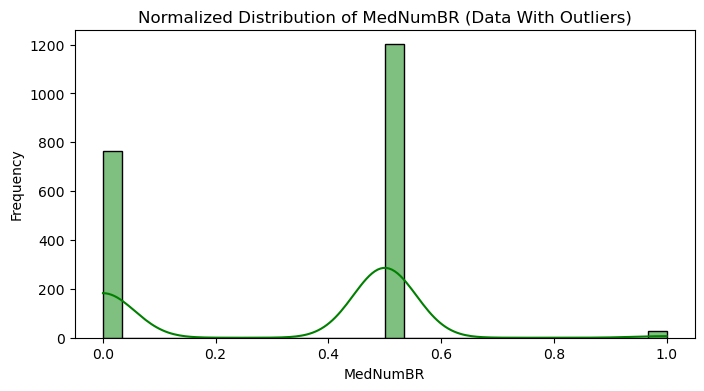


Feature: PctHousOccup
count    1994.000000
mean        0.719549
std         0.194024
min         0.000000
25%         0.630000
50%         0.770000
75%         0.860000
max         1.000000
Name: PctHousOccup, dtype: float64


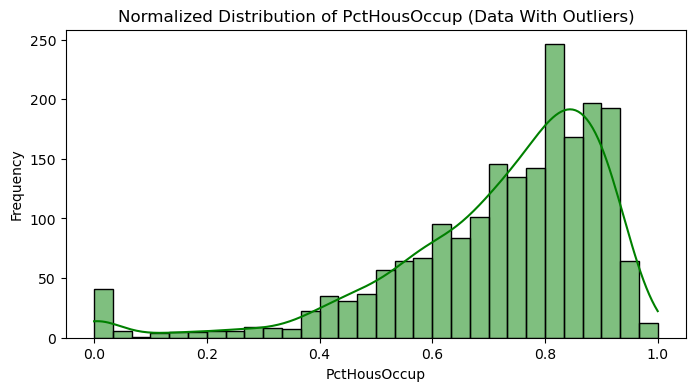


Feature: PctVacantBoarded
count    1994.000000
mean        0.204529
std         0.217770
min         0.000000
25%         0.060000
50%         0.130000
75%         0.270000
max         1.000000
Name: PctVacantBoarded, dtype: float64


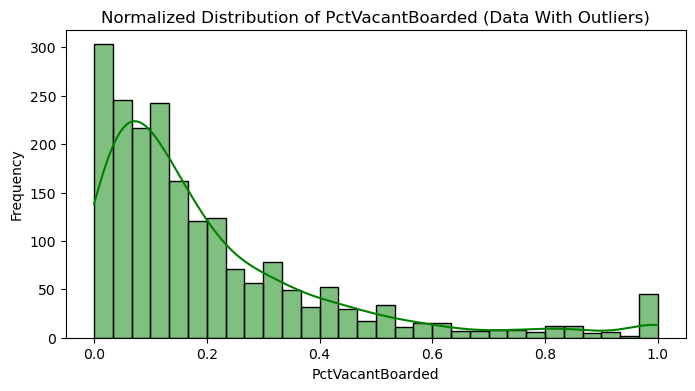


Feature: PctVacMore6Mos
count    1994.000000
mean        0.433335
std         0.188986
min         0.000000
25%         0.290000
50%         0.420000
75%         0.560000
max         1.000000
Name: PctVacMore6Mos, dtype: float64


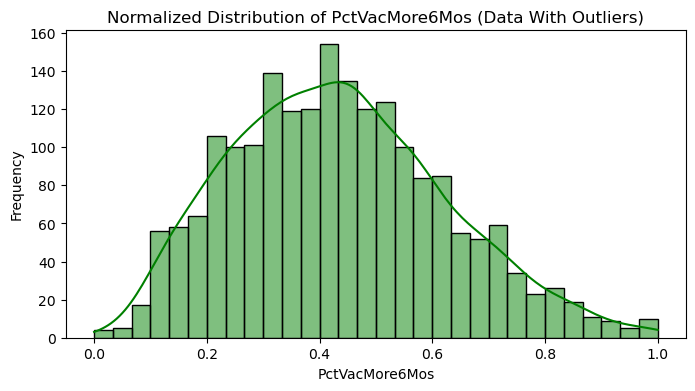


Feature: MedYrHousBuilt
count    1994.000000
mean        0.494178
std         0.232467
min         0.000000
25%         0.350000
50%         0.520000
75%         0.670000
max         1.000000
Name: MedYrHousBuilt, dtype: float64


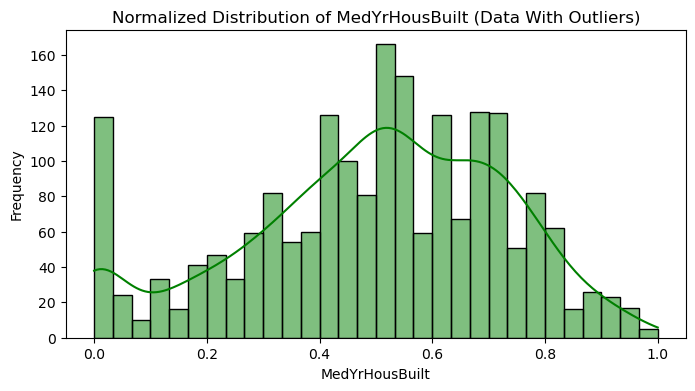


Feature: PctHousNoPhone
count    1994.000000
mean        0.264478
std         0.242847
min         0.000000
25%         0.060000
50%         0.185000
75%         0.420000
max         1.000000
Name: PctHousNoPhone, dtype: float64


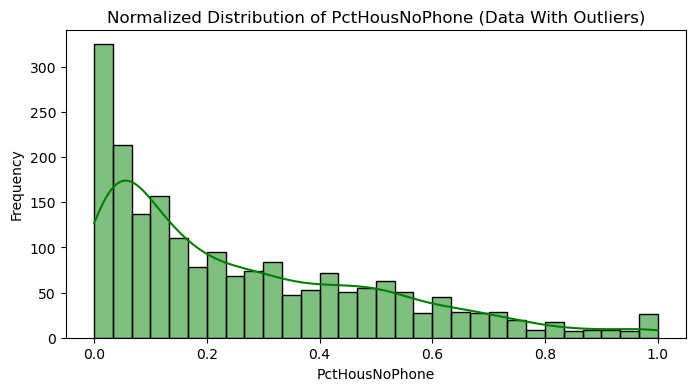


Feature: PctWOFullPlumb
count    1994.000000
mean        0.243059
std         0.206295
min         0.000000
25%         0.100000
50%         0.190000
75%         0.330000
max         1.000000
Name: PctWOFullPlumb, dtype: float64


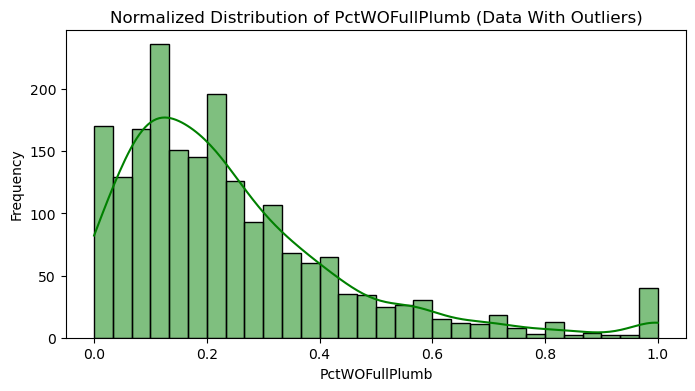


Feature: MedRentPctHousInc
count    1994.000000
mean        0.490125
std         0.169500
min         0.000000
25%         0.370000
50%         0.480000
75%         0.590000
max         1.000000
Name: MedRentPctHousInc, dtype: float64


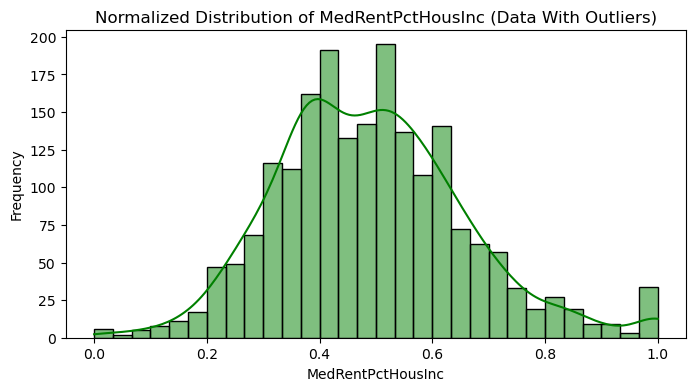


Feature: MedOwnCostPctInc
count    1994.000000
mean        0.449754
std         0.187274
min         0.000000
25%         0.320000
50%         0.450000
75%         0.580000
max         1.000000
Name: MedOwnCostPctInc, dtype: float64


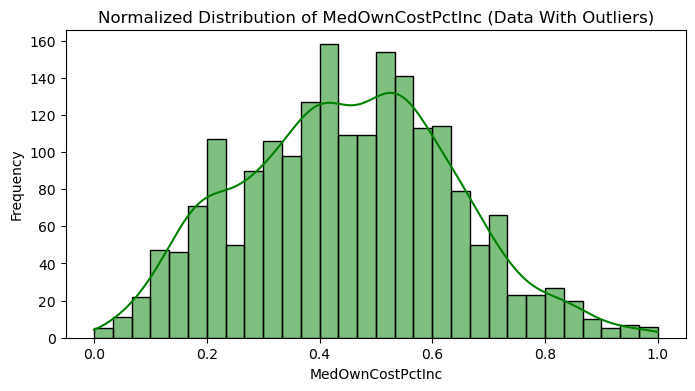


Feature: MedOwnCostPctIncNoMtg
count    1994.000000
mean        0.403816
std         0.192593
min         0.000000
25%         0.250000
50%         0.370000
75%         0.510000
max         1.000000
Name: MedOwnCostPctIncNoMtg, dtype: float64


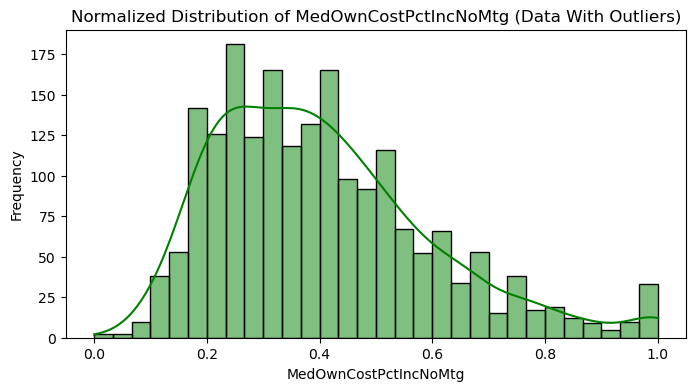


Feature: NumInShelters
count    1994.000000
mean        0.029438
std         0.102607
min         0.000000
25%         0.000000
50%         0.000000
75%         0.010000
max         1.000000
Name: NumInShelters, dtype: float64


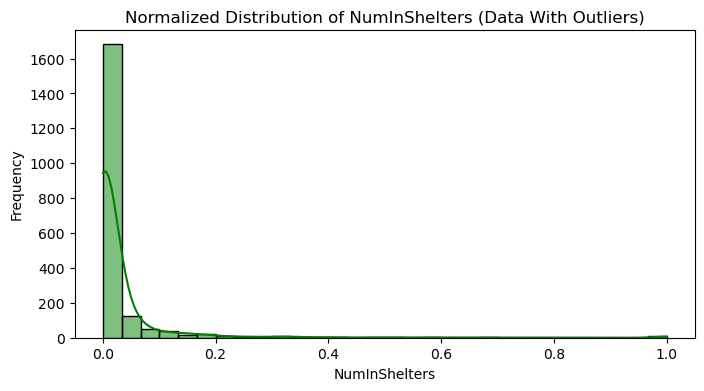


Feature: NumStreet
count    1994.000000
mean        0.022778
std         0.100400
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: NumStreet, dtype: float64


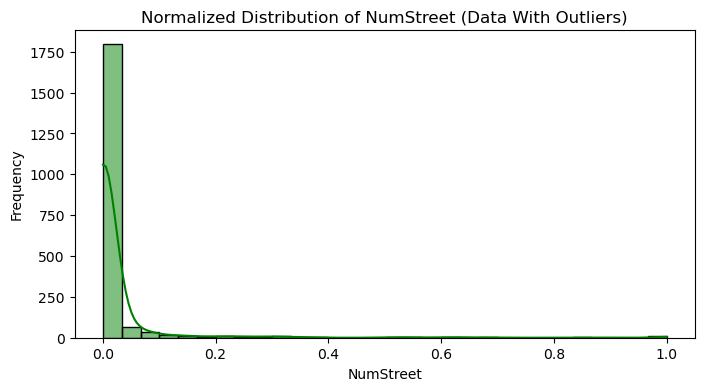


Feature: PctBornSameState
count    1994.000000
mean        0.608892
std         0.204329
min         0.000000
25%         0.470000
50%         0.630000
75%         0.777500
max         1.000000
Name: PctBornSameState, dtype: float64


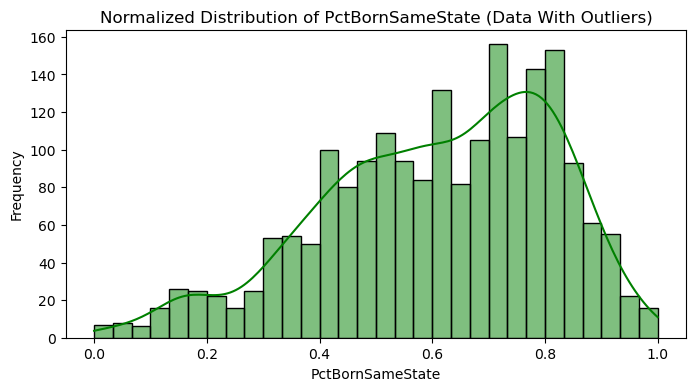


Feature: PctSameHouse85
count    1994.000000
mean        0.535050
std         0.181352
min         0.000000
25%         0.420000
50%         0.540000
75%         0.660000
max         1.000000
Name: PctSameHouse85, dtype: float64


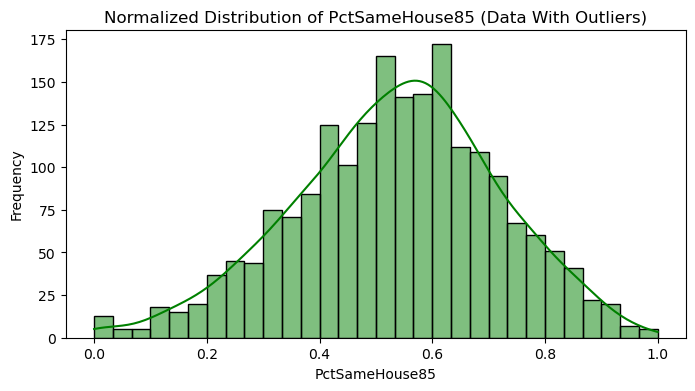


Feature: PctSameCity85
count    1994.000000
mean        0.626424
std         0.200521
min         0.000000
25%         0.520000
50%         0.670000
75%         0.770000
max         1.000000
Name: PctSameCity85, dtype: float64


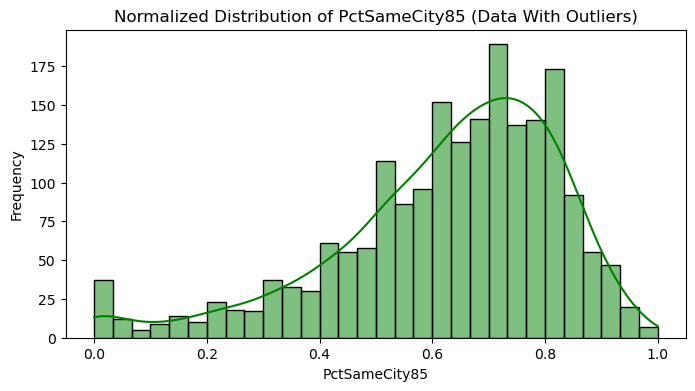


Feature: PctSameState85
count    1994.000000
mean        0.651530
std         0.198221
min         0.000000
25%         0.560000
50%         0.700000
75%         0.790000
max         1.000000
Name: PctSameState85, dtype: float64


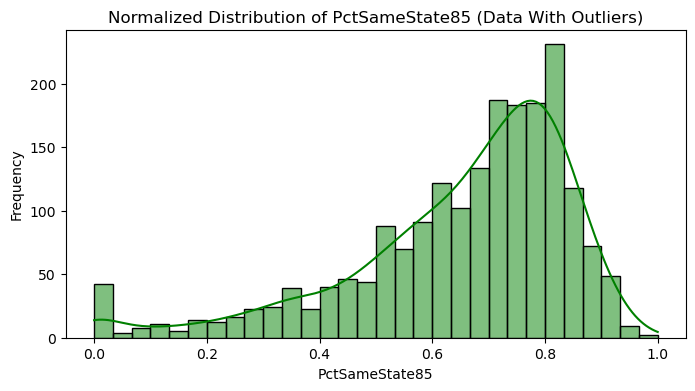


Feature: LandArea
count    1994.000000
mean        0.065231
std         0.109459
min         0.000000
25%         0.020000
50%         0.040000
75%         0.070000
max         1.000000
Name: LandArea, dtype: float64


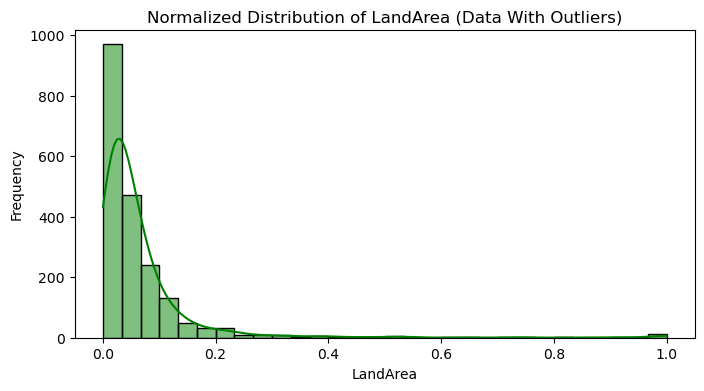


Feature: PopDens
count    1994.000000
mean        0.232854
std         0.203092
min         0.000000
25%         0.100000
50%         0.170000
75%         0.280000
max         1.000000
Name: PopDens, dtype: float64


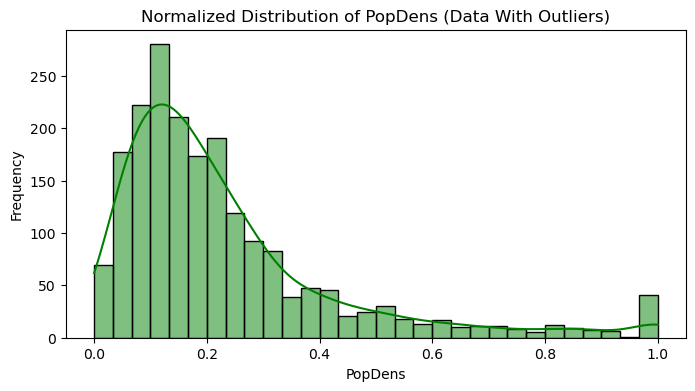


Feature: PctUsePubTrans
count    1994.000000
mean        0.161685
std         0.229055
min         0.000000
25%         0.020000
50%         0.070000
75%         0.190000
max         1.000000
Name: PctUsePubTrans, dtype: float64


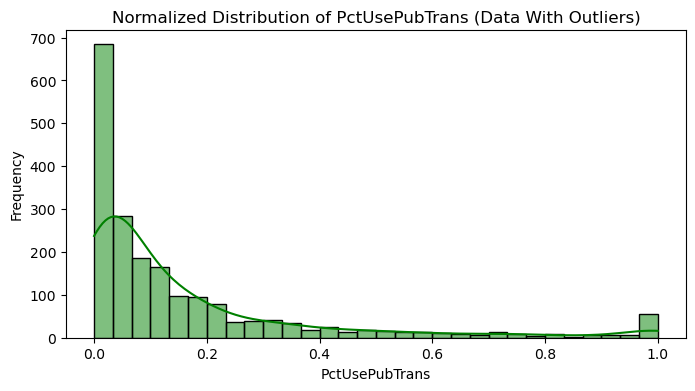


Feature: LemasPctOfficDrugUn
count    1994.000000
mean        0.094052
std         0.240328
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: LemasPctOfficDrugUn, dtype: float64


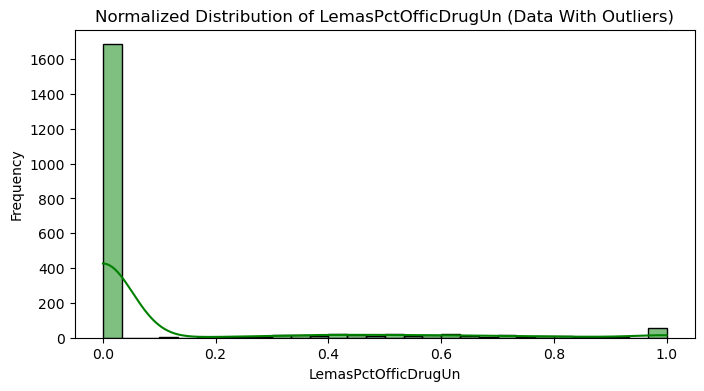


Feature: ViolentCrimesPerPop
count    1994.000000
mean        0.237979
std         0.232985
min         0.000000
25%         0.070000
50%         0.150000
75%         0.330000
max         1.000000
Name: ViolentCrimesPerPop, dtype: float64


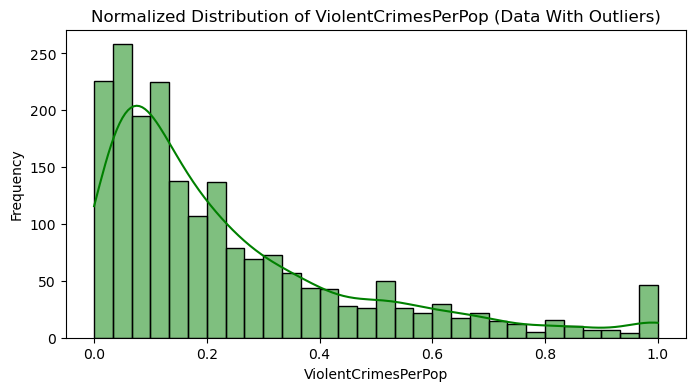

In [8]:
# Visualize the features for both datasets
datasets = {
    "Data Without Outliers": pd.read_csv("./data_final_no_outlier.csv"),
    "Data With Outliers": pd.read_csv("./data_final_with_outlier.csv")
}

for dataset_name, dataset in datasets.items():
    print(f"\n==== {dataset_name} ====")
    
    # Identify numeric and categorical features for the current dataset
    numeric_features = dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = dataset.select_dtypes(include=['object', 'category']).columns.tolist()
    
    print(f"Numeric Features: {numeric_features}")
    print(f"Categorical Features: {categorical_features}")
    
    # Visualize numeric features
    for feature in numeric_features:
        print(f"\nFeature: {feature}")
        print(dataset[feature].describe())
        
        plt.figure(figsize=(8, 4))
        sns.histplot(dataset[feature], kde=True, bins=30, color='green')
        plt.title(f"Normalized Distribution of {feature} ({dataset_name})")
        plt.xlabel(feature)
        plt.ylabel("Frequency")
        plt.show()
    
    # Visualize categorical features
    for feature in categorical_features:
        print(f"\nFeature: {feature}")
        print(dataset[feature].value_counts())
        
        plt.figure(figsize=(8, 4))
        sns.countplot(y=dataset[feature], order=dataset[feature].value_counts().index, palette="viridis")
        plt.title(f"Distribution of {feature} ({dataset_name})")
        plt.ylabel(feature)
        plt.xlabel("Count")
        plt.show()